<a href="https://colab.research.google.com/github/bsekiewicz/dw_competition/blob/master/notebook_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition
## 6th edition of the "Practical Machine Learning" course




### Cel:
Prognozowanie wartości zwrotu dla danego zamówienia. 


## Na czym polega konkurs?
Jest sklep online, który sprzedaje różne produkty dla ludzi z różnych krajów. Jedno zamówienie (faktura) może zawierać więcej niż jeden produkt. Trend, który jest dość popularny w szczególności w krajach zachodnich, to możliwość zwrotów i klienci chętnie z tego korzystają. Zwroty generują koszty i warto umieć przewidzieć to i jakoś z tym podziałać (pomijając skrajne przypadki takie jak "nie sprzedawać" klientowi X, bo to pewnie jest zakazane prawem). Natomiast pewnie dałoby się coś zrobić, jeśli wiedzielibyśmy, które zamówienia mogą być z dużym prawdopodobieństwem zwrócone.

**To zadanie można podzielić na 2 części**: z jednej strony jest to klasyfikacja, ponieważ ostatecznie trzeba stwierdzić, **czy ten produkt będzie zwrócony czy nie**. Z drugiej strony (i to jest docelowe zadanie) przez to, że zamówienie może zawierać więcej niż jeden produkt, to **ostatecznie chcemy obliczyć sumaryczny koszt zwrotów**. Możesz założyć, że jeśli w danym złożonym i opłaconym zamówieniu jest zwrot nawet jednego produktu, to zwracana jest całość zamówienia (czyli wszystkie produkty zawarte w tym zamówieniu). **Suma cen tych produktów daje całkowitą wartość zwrotu, właśnie to będziemy przewidydwać**.


### Metryką sukcesu
będzie **mean squared error**.

Dlaczego taka metryka? 
- Po pierwsze którąś trzeba wybrać :) 
- Po drugie, warto zrobić to w taki sposób, aby nie zajęło zbyt wiele czasu na zastanawianie się nad tym. Jeśli w trakcie konkursu uznasz, że któraś byłaby lepsza, to super. Oczywiście w ramach konkursu metryka zostanie jak wyżej, ale jak najbardziej przy okazji polecam zastanowić się, czy da się zrobić to lepiej.
- Po trzecie, [zasada Pareta](https://pl.wikipedia.org/wiki/Zasada_Pareta) naprawdę działa, czyli 20% wysiłku tworzy nam 80% wartości (i też można uznać, że działa to w drugą stronę). Nawet powiem więcej, warto to jeszcze podkręcić do kwadratu i koncentrować się na 4% wysiłku, aby uzyskać 64% wartości.

Zobacz na przykładzie. Sprawdziłem 4% najdroższych zwrotów i okazało się, że to 80% wartości do wszystkich zwrotów. Zobacz, jak rozkład wygląda na wykresie.
![](cumsum.png)

Dlatego w tym przypadku warto bardzo karać przypadki większe, `mean_square_error` robi to całkiem dobrze.


### Kaggle
Konkurs będzie dostępny na Kaggle - linku do konkursu szukaj w mailu. 


### Regulamin
1. Konkurs rozpoczyna się **31 marca 2020 r.** i kończy się w niedzielę, **12 kwietnia 2020 r. o 23:59** (UTC).
2. Zbiór danych został podzielony na dwie części: publiczny i prywatny. Publiczny zbiór danych zawiera cechy + odpowiedź, prywatny zbiór tylko cechy. Należy zrobić predykcję na prywatnym zbiorze i wysłać na Kaggle. Gdy skończy się konkurs, to ostateczny wynik będzie na zbiorze prywatnym.
3. Dane są przygotowane w celach edukacyjnych, zakazane jest ich używanie w innym celu niż ten kurs oraz zakazane jest upublicznianie danych w dowolny sposób. Rozwiązanie ma być oparte tylko i wyłącznie przy użyciu uczenia maszynowego (trenowanie modelu na podstawie udostępnionych danych). Nie ma co kombinować, skup się na nauce :).
4. W tym konkursie jako absolwenci możecie łączyć się w drużyny. Każdy uczestnik / drużyna może dodać rozwiązanie (czyli zrobić tak zwany *submit*) do 5 prób rozwiązań w jeden dzień (dlatego warto zacząć wcześniej, będzie więcej prób).
5. Wszyscy absolwenci biorący udział w konkursie opublikują wszystkim swoje najlepsze rozwiązanie i udostępnią je podając link na Slacku.


### Dane

W danych jest **1 067 371** wierszy, które zostały podzielone prawie na równe części:
- `train_online_retail` (520 142 wierszy)
- `test_online_retail` (547 229 wierszy)

Uwaga! Zwróć uwagę, że w wierszach jest pojedynczy produkt, a zamówienie może się składać z kilku produktów. Docelowo będziemy prognozować kwotę do zwrotu dla danego zamówienia. **Twoim zadaniem jest zrobić predykcję wartości zamówienia do zwrotu dla zbioru testowego**. 


Jak robisz `submit` na Kaggle, to jest wyliczany wynik. Zwróć uwagę, że wynik jest wyliczany tylko na 30% danych testowych i ten wynik jest widoczny na tak zwanym "Public Leader Board". 

W praktyce to oznacza, że w Twoim zbiorze treningowym są odpowiedzi, ale masz tak trenować model, aby móc go zwalidować najpierw lokalnie (czyli użyć np. walidację krzyżową lub coś bardziej zaawansowanego). Następnie wrzucasz swój wynik na Kaggle (jako plik csv). W ciągu dnia masz maksymalnie 5 prób (czym wcześniej zaczniesz robić konkurs, tym więcej będziesz mieć prób). W trakcie konkursu Twój wyliczony wynik jest sprawdzony tylko na części danych (w tym przypadku 30%). To jest tak zwany Public Leader Board.

![](../images/public_private.png)

Gdy konkurs się skończy, wynik będzie przeliczony na wszystkich dostępnych danych testowych i będzie dostępny na tak zwanym "Private Leader Board". Dlaczego tak się robi? Chodzi o to, że Twoje rozwiązanie powinno być jak najbardziej stabilne na jak najmniejszej jak i większej próbce danych. Dlatego musisz uważnie robić walidację, bo pierwsze miejsce na Public Leader Board nie musi być pierwszym na Private Leader Board :) Uważaj na to!

![](../images/30_70.png)


## Environment preparation.

In [0]:
# !pip install scikit-plot
# !pip install eli5
# !pip install --upgrade tables

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd '/content/drive/My Drive/Colab Notebooks/competition/data/'

/content/drive/My Drive/Colab Notebooks/competition/data


Libraries used:

In [0]:
import gc
import pandas as pd
import numpy as np
import string
import regex

from collections import defaultdict 

from sklearn.model_selection import StratifiedKFold, GroupKFold, train_test_split
from sklearn.metrics import mean_squared_error as mse, make_scorer
from sklearn import utils

from scikitplot.metrics import plot_confusion_matrix, plot_calibration_curve
from scikitplot.estimators import plot_learning_curve, plot_feature_importances

# from sklearn.dummy import DummyClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb

import eli5
from eli5.sklearn import PermutationImportance

from hyperopt import hp, fmin, tpe, STATUS_OK

import matplotlib.pyplot as plt
#%matplotlib inline

In [0]:
np.random.seed(0)

## Utilities

### Features engineering

In [0]:
# 
def get_feats(df, out=[]):
    feats = df.select_dtypes([np.number, np.bool]).columns
    black_list = ['is_test', 'is_canceled', 'is_canceled_pred', 'total_return', 'total_return_pred', 'weights']
    
    return [x for x in feats if x not in black_list + out]

# 
def group_by_key(df, group_key, agg_func, reversed=False):
    df_temp = df[~df['is_canceled'].isnull()].copy()
    if reversed:
        df_temp['is_canceled'] = df_temp['is_canceled'].map(lambda x: False if x else True)
    dict_ = df_temp.groupby(group_key)['is_canceled'].agg(agg_func).to_dict()
    if -1 in dict_: del dict_[-1]
    
    return df[group_key].map(lambda x: dict_.get(x, -1))

#
def group_by_key_alt(df, group_key, group_key_alt, agg_func, reversed=False):
    df_temp = df[~df['is_canceled'].isnull()].copy()
    if reversed:
        df_temp['is_canceled'] = df_temp['is_canceled'].map(lambda x: False if x else True)
    df_temp[group_key_alt] = df_temp[group_key_alt]*df_temp['is_canceled']
    dict_ = df_temp.groupby(group_key)[group_key_alt].agg(agg_func).to_dict()
    if -1 in dict_: del dict_[-1]
    
    return df[group_key].map(lambda x: dict_.get(x, -1))

#
def aggregate_by(df, group_key, agg_key, agg_name, agg_fun, filtered=False):
    if agg_name in df.columns:
        df = df.drop(agg_name, axis=1)
    if filtered:
        df_temp = df[~df['is_canceled'].isnull()].copy()
    else:
        df_temp = df.copy()
    return pd.merge(df, df_temp.groupby(group_key).agg(agg_name=(agg_key, agg_fun)), how='left', on=[group_key]).rename(columns = {'agg_name': agg_name})

# 
def prepare_categories(df, cats):
    for c in cats:
        df['cat_' + c] = df['description'].map(lambda x: c in str(x).lower())
    return df

### Model

In [0]:
### MODEL

# variable distribution
def dist(df, target='is_canceled', with_detailed=True): 
    df_temp = df[~df[target].isnull()]
    df_temp_agg = df_temp[['invoice', target]].drop_duplicates()
    df_temp_agg[target] = df_temp_agg[target].astype(np.int)

    detailed = df_temp[target].value_counts(normalize=True).values * 100
    orders = df_temp_agg[target].value_counts(normalize=True).values * 100

    if with_detailed:
        print('Distribution:\ndetailed: {} vs orders: {}'.format(detailed, orders))
    else:
        print('Distribution:\norders: {}'.format(orders))
    
    return None

#
def custom_error(df, strategy='proba', strategy_params={'threshold': 0.0001, 'agg_func': np.mean}, p=False):
    if strategy == 'proba':
        df_agg = pd.merge(df.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                          df.groupby('invoice')[['is_canceled_pred']].agg(strategy_params['agg_func']), 
                          how='left', on=['invoice']).reset_index()
        threshold = strategy_params['threshold']
    else:
        df_agg = df.groupby('invoice')[['price_total', 'is_canceled_pred', 'is_canceled']].sum().reset_index()
        threshold = 0

    df_agg['is_canceled']      = df_agg['is_canceled'] > 0
    df_agg['is_canceled_pred'] = df_agg['is_canceled_pred'] > threshold

    df_agg['total_return'] =      df_agg['price_total'] * df_agg['is_canceled']
    df_agg['total_return_pred'] = df_agg['price_total'] * df_agg['is_canceled_pred']

    mse_ = mse(df_agg['total_return'].values, df_agg['total_return_pred'].values)

    # reference scenario - dummy model
    df_agg['total_return_ref'] = 0
    mse_ref = mse(df_agg['total_return'].values, df_agg['total_return_ref'].values)

    if p:
        print('calc_custom_error summary:')
        print('target distribution')
        t = dist(df_agg, with_detailed=False)
        print('target_pred distribution')
        t = dist(df_agg, 'is_canceled_pred', with_detailed=False)    
        print('MSE vs MSE REF {} vs {} ({})'.format(mse_, mse_ref, min(mse_/mse_ref, 3)))

    return min(mse_/mse_ref, 3)

#
# def custom_score(y_true, y_pred, **kwargs):
#     df = kwargs['df'].loc[y_true.index, :]
#     strategy = kwargs.get('strategy', 'proba')
#     strategy_params = kwargs.get('strategy_params', {'threshold': 0.0001, 'agg_func': np.mean})

#     df['is_canceled_pred'] = y_pred
#     df['is_canceled_pred'] = df['is_canceled_pred']*df['invoice_weigths']

#     score = custom_error(df, strategy=strategy, strategy_params=strategy_params)

#     return 1-score

#
class CustomCV:
    def __init__(self, shuffle=True, n_splits=5, random_state=0, test_size=0.25):
        self.shuffle = shuffle
        self.n_splits = n_splits
        self.random_state = random_state
        self.test_size = test_size

    def split(self, df):
      # TODO: some weights to stabilize mse_ref between groups
      agg_invoices = df[['invoice', 'is_canceled']].groupby('invoice').agg(is_canceled = ('is_canceled', np.sum)).reset_index()
      agg_invoices.is_canceled = agg_invoices.is_canceled.map(lambda x: 10 if x>=10 else x)

      skf = StratifiedKFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=self.shuffle)
      for invoices_for_train_idx, invoices_for_valid_idx in skf.split(agg_invoices[['invoice']], agg_invoices['is_canceled']):
          # train_temp + valid
          train_temp_invoices = list(agg_invoices.iloc[invoices_for_train_idx].invoice)
          valid_invoices      = list(agg_invoices.iloc[invoices_for_valid_idx].invoice)

          temp_train_idx, valid_idx = \
          df[df.invoice.isin(train_temp_invoices)].index, df[df.invoice.isin(valid_invoices)].index

          # train_temp = train + test
          train_invoices, test_invoices = \
              train_test_split(agg_invoices[agg_invoices.invoice.isin(train_temp_invoices)]['invoice'], test_size=self.test_size,
              random_state=self.random_state,
              stratify=agg_invoices[agg_invoices.invoice.isin(train_temp_invoices)]['is_canceled']) 

          train_idx, test_idx = \
          df[df.invoice.isin(train_invoices)].index, df[df.invoice.isin(test_invoices)].index

          yield train_idx, test_idx, valid_idx

#
class CustomCVForPlot:
    def __init__(self, groups, index, shuffle=True, n_splits=5, random_state=0):
        self.groups = groups
        self.index = index
        self.shuffle = shuffle
        self.n_splits = n_splits
        self.random_state = random_state

    def split(self, X, y, groups=None):
        if self.shuffle:
            X, y, self.groups, self.index = \
            utils.shuffle(X, y, self.groups, self.index, random_state=self.random_state)

        group_kfold = GroupKFold(n_splits=self.n_splits)

        for train_idx, test_idx in group_kfold.split(X, y, self.groups):    
            yield train_idx, test_idx 

    def get_index(self):
        return self.index

#
def update_fold(df, idx, y_pred, target='is_canceled_pred'):
    df.loc[idx, [target]] = y_pred

#
def run_model(train_set, model_cls, model_params, feats,
              target='is_canceled', submit_set=None,
              n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
              threshold=0.0001, agg_func=np.mean,
              is_plot_learning_curve=False, is_plot_confusion_matrix=False):

    df = train_set.copy()
    df = df.reset_index(drop=True)

    print('FEATURES:\n\n {} \n'.format(feats))
    
    pred_feature = '{}_pred'.format(target)
    df[pred_feature] = np.nan

    df = aggregate_by(df, 'invoice', 'price_total', 'invoice_weigths', np.sum)
    df['invoice_weigths'] = df['price_total']/df['invoice_weigths']

    if submit_set is not None:
        df_submit = submit_set.copy()

        if 'invoice_weigths' in df_submit.columns:
            df_submit = df_submit.drop('invoice_weigths', axis=1)
        df_submit = aggregate_by(df_submit, 'invoice', 'price_total', 'invoice_weigths', np.sum)
        df_submit['invoice_weigths'] = df_submit['price_total']/df_submit['invoice_weigths']
        df_submit[pred_feature] = 0

        w_total = 0
    else:
        df_submit = None

    print('CUSTOM CV\n')

    X = df[feats].values
    y = df[target].values

    ccv = CustomCV(shuffle=shuffle, n_splits=n_splits, 
                  random_state=random_state, test_size=test_size)
    for train_idx, test_idx, valid_idx in ccv.split(df):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        X_valid, y_valid = X[valid_idx], y[valid_idx]

        # print('FULL DATA')
        # t = dist(df[['invoice', target]])
        # print('TRAIN SET')
        # t = dist(df.loc[train_idx,:][['invoice', target]])
        # print('TEST SET')
        # t = dist(df.loc[test_idx,:][['invoice', target]])
        # print('VALID SET')
        # t = dist(df.loc[valid_idx,:][['invoice', target]])

        model = model_cls(**model_params)
        
        # CLASS WEIGHTS
        class_weights = list(utils.class_weight.\
                             compute_class_weight('balanced', 
                                                  np.unique(y_train),
                                                  y_train))

        w_array = np.ones(y_train.shape[0], dtype = 'float')
        for i, val in enumerate(y_train):
            w_array[i] = class_weights[val-1]

        eval_set = [(X_train, y_train), (X_test, y_test)]

        model.fit(X_train, y_train, 
                  sample_weight=w_array, 
                  eval_set=eval_set, 
                  eval_metric=["auc", "error", "logloss"], 
                  early_stopping_rounds=100,
                  verbose=0)

        y_pred = model.predict_proba(X_valid)[:, 1]*df.loc[valid_idx, :]['invoice_weigths'] # weighted by total price

        update_fold(df, valid_idx, y_pred)

        if submit_set is not None:
            w = custom_error(df.loc[valid_idx, :], strategy='proba', strategy_params={'threshold': threshold, 'agg_func': agg_func})
            w_total += 1/w

            y_pred_submit = model.predict_proba(df_submit[feats].values)[:, 1]*df_submit['invoice_weigths'] # weighted by total price
            df_submit[pred_feature] = df_submit[pred_feature] + y_pred_submit*1/w

    if submit_set is not None:
      df_submit[pred_feature] = df_submit[pred_feature]/w_total

      if target in df_submit.columns and (str(df_submit[target].iloc[0]).lower() != 'nan'):
          df_submit = pd.merge(df_submit.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                               df_submit.groupby('invoice')[[pred_feature]].agg(agg_func), 
                               how='left', on=['invoice']).reset_index()

          df_submit[target]         = df_submit[target] > 0
          df_submit['total_return'] = df_submit['price_total'] * df_submit[target]
      else:
          df_submit = df_submit.groupby('invoice')[['price_total', pred_feature]].agg(agg_func).reset_index()        

      df_submit[pred_feature] = df_submit[pred_feature] > threshold
      df_submit['total_return_pred'] = df_submit['price_total'] * df_submit[pred_feature] 

    print('mse: ', custom_error(df, strategy='proba', 
                                strategy_params={'threshold': threshold, 
                                                 'agg_func': agg_func}, p=True))
            
    # TOODO: prepare my_estimator or scorer
    if is_plot_learning_curve:
        # custom_scorer = make_scorer(custom_score, needs_proba=True, df=df)

        title = 'Learning curve: {} {}'.format(model_cls.__name__, model_params)
        cv = CustomCVForPlot(df['invoice'], df.index)
        plot_learning_curve(model_cls(**model_params), df[feats], df[target], 
                            title=title, figsize=(15, 5), random_state=0, 
                            cv=cv, scoring='roc_auc')
        
    if is_plot_confusion_matrix:
        strategy = 'proba'
        strategy_params={'threshold': threshold, 'agg_func': agg_func}

        if strategy == 'proba':
            agg = pd.merge(df.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                           df.groupby('invoice')[['is_canceled_pred']].agg(strategy_params['agg_func']), 
                           how='left', on=['invoice']).reset_index()
            threshold = strategy_params['threshold']
        else:
            agg = df.groupby('invoice')[['price_total', 'is_canceled_pred', 'is_canceled']].sum().reset_index()
            threshold = 0

        agg['is_canceled']      = agg['is_canceled'] > 0
        agg['is_canceled_pred'] = agg['is_canceled_pred'] > threshold

        plot_confusion_matrix(agg['is_canceled'], agg['is_canceled_pred'])

    return custom_error(df, strategy='proba', 
                        strategy_params={'threshold': threshold, 
                                         'agg_func': agg_func}), df_submit
    
def plot_feature_importances(df, model_cls, model_params, feats, target='is_canceled'):
    print(feats)
    
    X = df[feats].values
    y = df[target].values

    model = model_cls(**model_params)

    class_weights = list(utils.class_weight.\
                         compute_class_weight('balanced', 
                                              np.unique(y),
                                              y))

    w_array = np.ones(y.shape[0], dtype = 'float')
    for i, val in enumerate(y):
        w_array[i] = class_weights[val-1]

    model.fit(X, y, eval_metric=["auc","error","logloss"], sample_weight=w_array)

    perm = PermutationImportance(model, random_state=0).fit(X, y)
    return eli5.show_weights(perm, feature_names=feats, top=30)

# TODO:
def obj_func(params):
    print("Training with params: ")

    print(params['params'])
    print(params['threshold'])

    score, e = run_model(train, model, params['params'], feats, 
                         n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                         threshold=params['threshold'], agg_func=params.get('agg_func', np.mean),
                         is_plot_learning_curve=False, is_plot_confusion_matrix=False)
    
    print('SCORE: {}'.format(score))
    print('---------------- \n')

    return {'loss': score, 'status': STATUS_OK}


def optimization(params, max_evals=30):
    best = fmin(obj_func, params, algo=tpe.suggest, max_evals=max_evals, return_argmin=False)
    print('---------------- \n')

    print(best)

    return best

# TODO: cleaning
def update_submit_set(df_dropped, df2_test, path='submission.csv'):
    df1 = df_dropped.copy()
    df1 = df1[df1.is_test]


    # Adjust bad debt => False
    df1.loc[df1.description == 'Adjust bad debt', 'is_canceled'] = False

    # '30479', '30477' => False
    df1.loc[df1.invoice.isin(['30479', '30477']), 'is_canceled'] = False

    # AMAZON FEE => True
    df1.loc[df1.description == 'AMAZON FEE', 'is_canceled'] = True

    # 0 valued
    df1.loc[df1.is_canceled.map(lambda x: str(x) == 'nan'), 'is_canceled'] = False


    df1 = df1[['invoice', 'is_canceled']].drop_duplicates()
    # df1

    df2 = df2_test.copy()
    df2 = df2[['invoice', 'is_canceled_pred']].drop_duplicates().rename(columns={'is_canceled_pred': 'is_canceled'})
    # df2

    df_submission = pd.concat([df1, df2])
    df_submission = pd.merge(df_submission, invoce_price_total_backup, how='left', on=['invoice']).sort_values('invoice')

    df_submission['total_return'] = df_submission['is_canceled']*df_submission['price_total']

    df_submission[['invoice', 'total_return']].to_csv(path, index=False)

    return df_submission

In [0]:
# ### TEST FUNC
# train = pd.read_hdf('train_online_retail.h5').reset_index(drop=True)
# xgb_params = {'max_depth': 10, 'n_estimators': 300, 'learning_rate': 0.25, 
#               'random_state': 0, 'tree_method': 'gpu_hist'}
# run_cv(train, xgb.XGBClassifier, xgb_params, get_feats(train), n_splits=5,
#        threshold=0.0004, 
#        is_plot_learning_curve=True, is_plot_confusion_matrix=True)

## Data preparation

In [0]:
train = pd.read_hdf('train_online_retail.h5').reset_index(drop=True)
test  = pd.read_hdf('test_online_retail.h5').reset_index(drop=True)

df = pd.concat([train, test], sort=False)

del train, test

In [0]:
# repair price total
df['price_total'] = df['quantity'] * df['price_unit']

**Duplicates ?!**

In [16]:
df[df.invoice == 28480][['invoice', 'stock_code', 'description', 'price_total']]

,invoice,stock_code,description,price_total
264357,28480,4465,NEWSPAPER STAND,227.484375
264358,28480,3892,MEMO BOARD RETROSPOT DESIGN,802.750000
264359,28480,560,CREAM HEART CARD HOLDER,2329.031250
264360,28480,2667,BLACK HEART CARD HOLDER,2329.031250
264361,28480,1876,VINTAGE POST OFFICE CABINET,527.812500
264362,28480,3362,VINTAGE UNION JACK MEMOBOARD,3827.343750
264363,28480,778,CREAM SWEETHEART LETTER RACK,620.937500
264364,28480,2499,WOOD BLACK BOARD ANT WHITE FINISH,2868.750000
264365,28480,4566,HALL CABINET WITH 3 DRAWERS,2353.500000
277035,28480,4465,NEWSPAPER STAND,227.484375


In [0]:
invoce_price_total_backup = df.groupby('invoice')['price_total'].sum().reset_index()

In [0]:
df = df.drop_duplicates().reset_index(drop=True)

In [19]:
gc.collect()  # release memory

110

In [0]:
df_to_drop = pd.DataFrame()

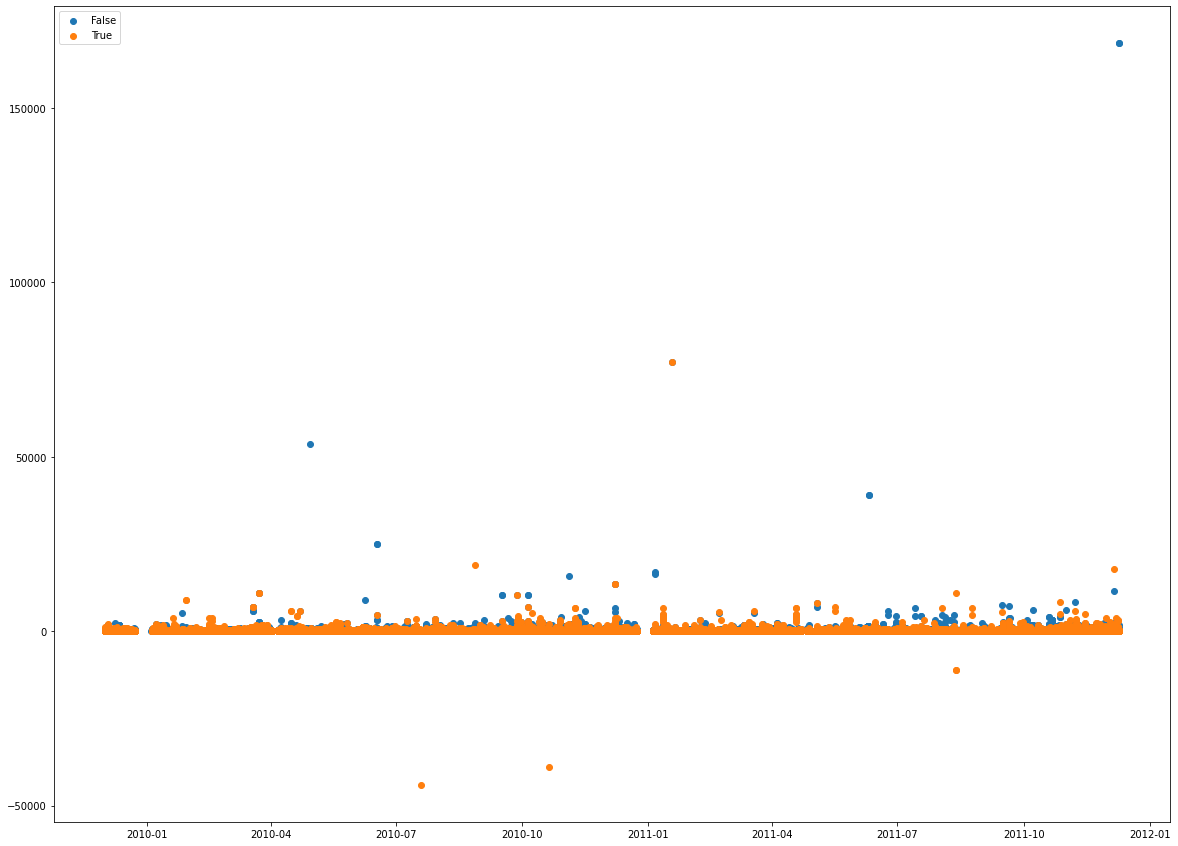

In [21]:
# quick overview of price total

plt.figure(figsize=(20,15))
for name, group in df.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["price_total"], label=name)
plt.legend()
plt.show()

In [22]:
df[df.price_total < 0][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]

,invoice,description,invoice_date,price_total,customer_id,is_canceled
641863,16004,Adjust bad debt,2010-07-19 11:24:00,-44032.0,-1,NaN
706167,23005,Adjust bad debt,2010-10-20 12:04:00,-38912.0,-1,NaN
911121,43158,Adjust bad debt,2011-08-12 14:51:00,-11064.0,-1,NaN
911122,43159,Adjust bad debt,2011-08-12 14:52:00,-11064.0,-1,NaN


In [23]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(df[(df.description == 'Adjust bad debt')].invoice)]], ignore_index=True)
df[df.description == 'Adjust bad debt'][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]  # OUT => set False

,invoice,description,invoice_date,price_total,customer_id,is_canceled
89731,10049,Adjust bad debt,2010-04-29 13:36:00,53600.0,-1,False
641863,16004,Adjust bad debt,2010-07-19 11:24:00,-44032.0,-1,NaN
706167,23005,Adjust bad debt,2010-10-20 12:04:00,-38912.0,-1,NaN
911120,43157,Adjust bad debt,2011-08-12 14:50:00,11064.0,-1,NaN
911121,43158,Adjust bad debt,2011-08-12 14:51:00,-11064.0,-1,NaN
911122,43159,Adjust bad debt,2011-08-12 14:52:00,-11064.0,-1,NaN


In [24]:
df[df.price_total > 10000][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]

,invoice,description,invoice_date,price_total,customer_id,is_canceled
68125,7609,Manual,2010-03-23 15:20:00,10952.000000,2100,True
68126,7611,Manual,2010-03-23 15:24:00,10952.000000,2100,True
89731,10049,Adjust bad debt,2010-04-29 13:36:00,53600.000000,-1,False
120439,14000,Manual,2010-06-17 16:52:00,25104.000000,2959,True
120440,14002,Manual,2010-06-17 16:53:00,25104.000000,-1,False
167307,19775,Manual,2010-09-16 14:53:00,10472.000000,580,True
167309,19778,Manual,2010-09-16 15:12:00,10472.000000,-1,False
175405,20640,Manual,2010-09-27 16:12:00,10472.000000,580,False
182549,21421,Manual,2010-10-05 11:47:00,10472.000000,580,True
182550,21422,Manual,2010-10-05 11:49:00,10472.000000,-1,False


In [0]:
# df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['14000', '14000'])]], ignore_index=True)
# df[df.invoice.isin(['14000', '14002'])][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]

In [26]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['30479', '30477'])]], ignore_index=True)
df[df.invoice.isin(['30479', '30477'])][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]  # OUT => set False

,invoice,description,invoice_date,price_total,customer_id,is_canceled
272422,30479,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:17:00,77186.499023,836,True
789433,30477,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:01:00,77186.499023,836,NaN


In [27]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['53587', '53588'])]], ignore_index=True)
df[df.invoice.isin(['53587', '53588'])][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]  # OUT

,invoice,description,invoice_date,price_total,customer_id,is_canceled
503269,53587,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:15:00,168475.927734,3689,False
503270,53588,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,168475.927734,3689,True


In [28]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['39258', '39260'])]], ignore_index=True)
df[df.invoice.isin(['39258', '39260'])][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']]  # OUT

,invoice,description,invoice_date,price_total,customer_id,is_canceled
350593,39258,PICNIC BASKET WICKER 60 PIECES,2011-06-10 15:28:00,38970.0,5040,False
350594,39260,Manual,2011-06-10 15:31:00,38976.0,5040,True


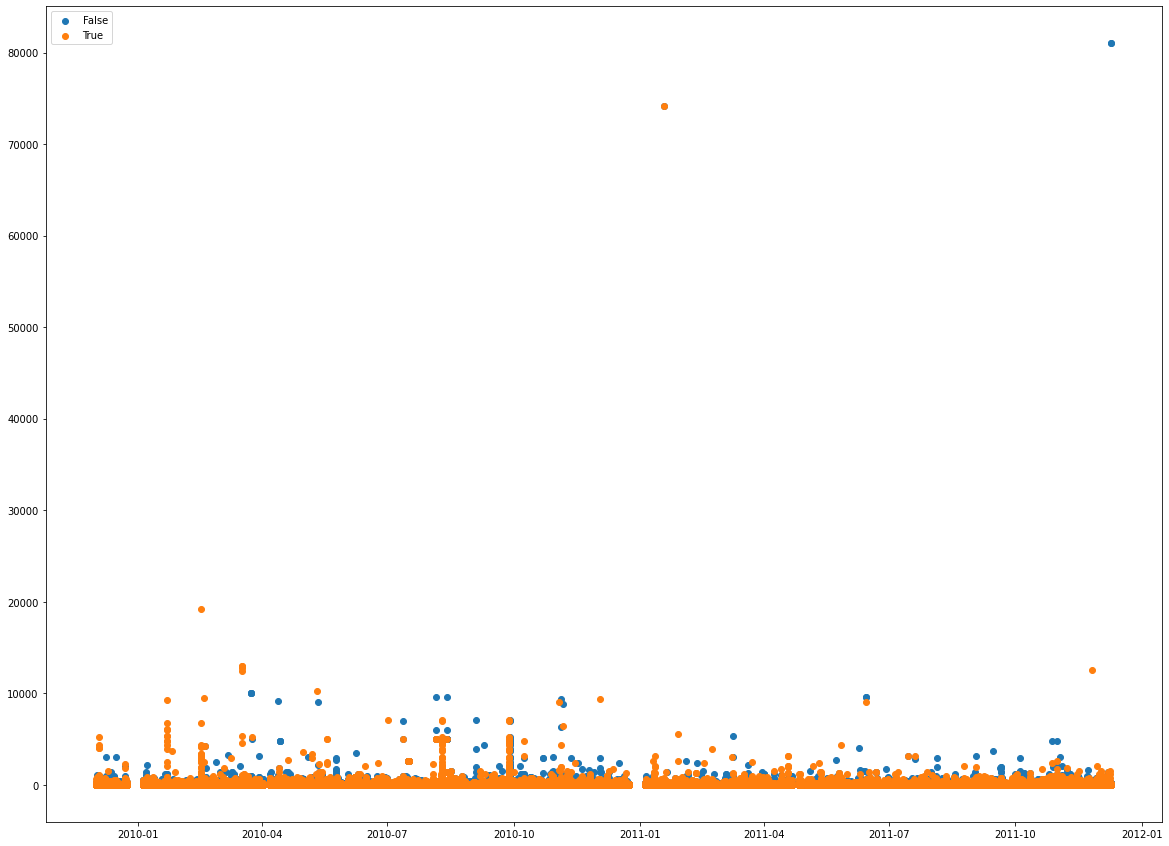

In [29]:
# quick overview of quantity

plt.figure(figsize=(20,15))
for name, group in df.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["quantity"], label=name)
plt.legend()
plt.show()

In [30]:
df[df.quantity > 10000][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']] # look at price total

,invoice,description,invoice_date,price_total,customer_id,is_canceled
272422,30479,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:17:00,77186.499023,836,True
503269,53587,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:15:00,168475.927734,3689,False
503270,53588,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,168475.927734,3689,True
548121,4996,BLACK AND WHITE PAISLEY FLOWER MUG,2010-02-15 11:57:00,1914.732422,606,NaN
566160,7161,SET/6 STRAWBERRY PAPER CUPS,2010-03-17 13:09:00,1295.683594,606,NaN
566161,7161,SET/6 STRAWBERRY PAPER PLATES,2010-03-17 13:09:00,1247.695312,606,NaN
566162,7161,SET/6 WOODLAND PAPER PLATES,2010-03-17 13:09:00,1295.683594,606,NaN
566163,7161,SET/6 WOODLAND PAPER CUPS,2010-03-17 13:09:00,1274.088867,606,NaN
598609,10823,FLAG OF ST GEORGE CAR FLAG,2010-05-10 14:55:00,0.000000,-1,NaN
789433,30477,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:01:00,77186.499023,836,NaN


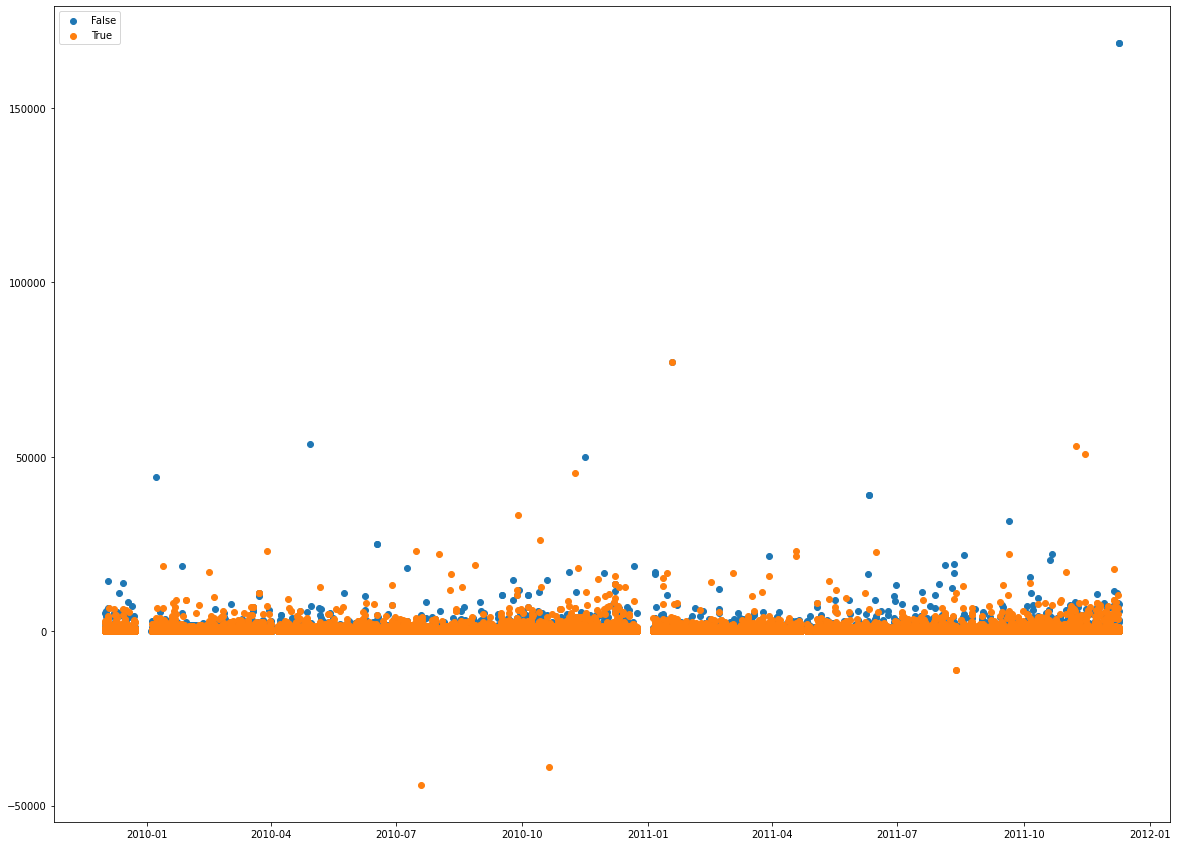

In [31]:
# quick overview of invoice price total

tmp = df.copy() 
tmp = aggregate_by(df, 'invoice', 'price_total', 'invoice_price_total', np.sum)
tmp = tmp[['invoice', 'invoice_date', 'is_test', 'invoice_price_total']].\
        drop_duplicates(['invoice', 'is_test', 'invoice_price_total'])

plt.figure(figsize=(20,15))
for name, group in tmp.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["invoice_price_total"], label=name)
plt.legend()
plt.show()

In [32]:
tmp[tmp.invoice_price_total < 0]

,invoice,invoice_date,is_test,invoice_price_total
641863,16004,2010-07-19 11:24:00,True,-44032.0
706167,23005,2010-10-20 12:04:00,True,-38912.0
911121,43158,2011-08-12 14:51:00,True,-11064.0
911122,43159,2011-08-12 14:52:00,True,-11064.0


In [33]:
tmp[tmp.invoice_price_total > 30000]

,invoice,invoice_date,is_test,invoice_price_total
24441,2488,2010-01-07 12:34:00,False,44053.907227
89731,10049,2010-04-29 13:36:00,False,53600.000000
225253,25892,2010-11-15 16:02:00,False,49840.712891
272422,30479,2011-01-18 10:17:00,False,77186.499023
350593,39258,2011-06-10 15:28:00,False,38970.000000
350594,39260,2011-06-10 15:31:00,False,38976.000000
410109,45511,2011-09-20 11:05:00,False,31695.267578
503269,53587,2011-12-09 09:15:00,False,168475.927734
503270,53588,2011-12-09 09:27:00,False,168475.927734
683605,20662,2010-09-27 16:59:00,True,33164.734375


In [34]:
df[df.invoice.isin(['2488', '25892', '25072', '49856', '50671', '45511', '20662'])][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']] # IT'S OK

,invoice,description,invoice_date,price_total,customer_id,is_canceled
24441,2488,VINTAGE SNAKES & LADDERS,2010-01-07 12:34:00,732.375000,49,False
24442,2488,LARGE RED SPOT WINDMILL,2010-01-07 12:34:00,532.687500,49,False
24443,2488,SET OF 36 PAISLEY FLOWER DOILIES,2010-01-07 12:34:00,360.000000,49,False
24444,2488,HOME SWEET HOME MUG,2010-01-07 12:34:00,305.156250,49,False
24445,2488,SMALL RED SPOT WINDMILL,2010-01-07 12:34:00,203.437500,49,False
...,...,...,...,...,...,...
995663,50671,PINK BLUE FELT CRAFT TRINKET BOX,2011-11-14 17:55:00,725.507812,-1,NaN
995664,50671,HANGING HEART JAR T-LIGHT HOLDER,2011-11-14 17:55:00,725.507812,-1,NaN
995665,50671,ANTIQUE SILVER T-LIGHT GLASS,2011-11-14 17:55:00,383.398438,-1,NaN
995666,50671,ZINC WILLIE WINKIE CANDLE STICK,2011-11-14 17:55:00,183.318359,-1,NaN


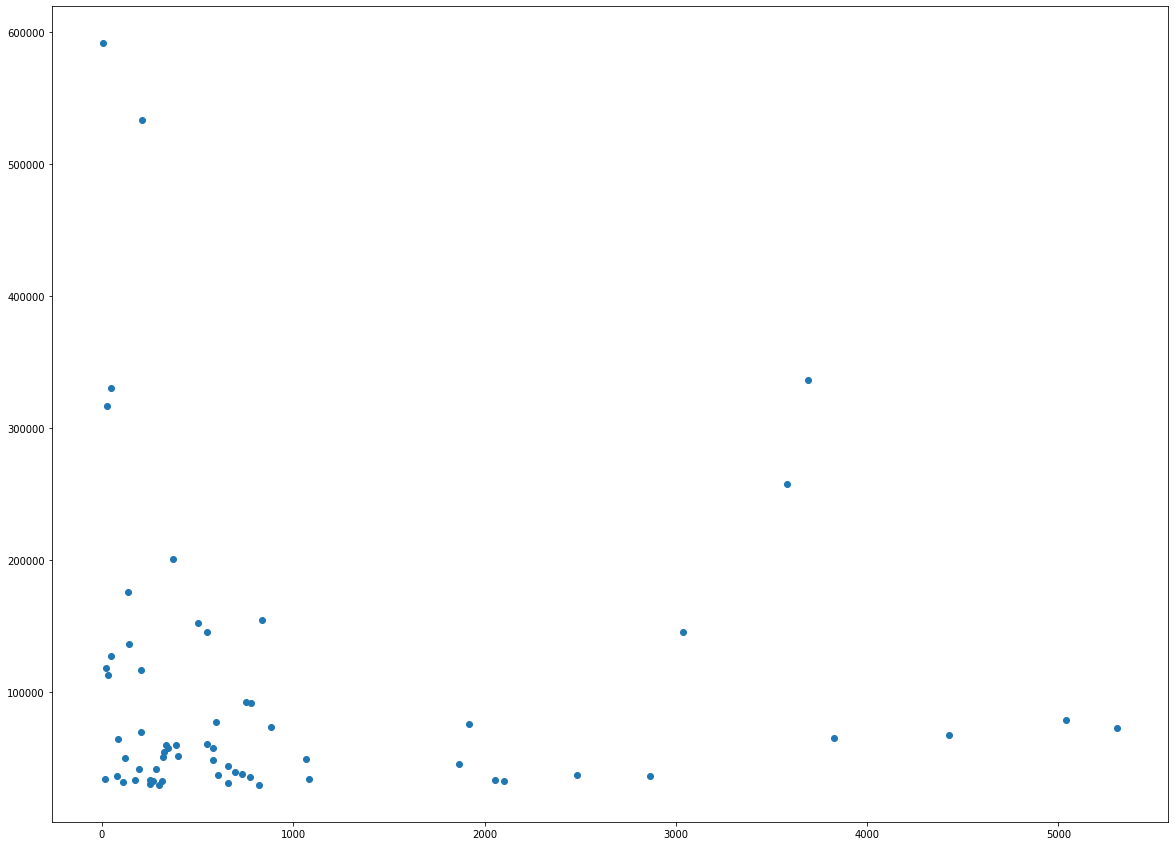

In [35]:
# quick overview of customer price total

tmp = df.copy() 
tmp = aggregate_by(df, 'customer_id', 'price_total', 'customer_price_total', np.sum)
tmp = tmp[tmp.customer_id != -1]
tmp = tmp[['customer_id', 'customer_price_total']].drop_duplicates()
tmp = tmp[tmp.customer_price_total > 30000]

plt.figure(figsize=(20,15))
plt.scatter(tmp["customer_id"], tmp["customer_price_total"])
plt.show()

In [0]:
# tmp.sort_values('customer_price_total', ascending=False)

In [0]:
tmp2 = df.copy() 
tmp2.is_canceled = tmp2.is_canceled.map(lambda x: str(x))
tmp2 = pd.merge(tmp2, tmp2.groupby(['customer_id', 'is_canceled']).agg(agg_name=('price_total', np.sum)).reset_index(), how='left', on=['customer_id', 'is_canceled']).rename(columns = {'agg_name': 'customer_price_total'})
tmp2 = tmp2[tmp2.customer_id.isin(list(tmp.sort_values('customer_price_total', ascending=False).customer_id))][['invoice', 'customer_id', 'is_canceled', 'customer_price_total']].drop_duplicates()

In [38]:
tmp2[tmp2.customer_id > 2000]

,invoice,customer_id,is_canceled,customer_price_total
65732,7311,2056,False,6960.000000
65816,7314,2056,True,12756.000000
65817,7316,2056,True,12756.000000
68125,7609,2100,True,21904.000000
68126,7611,2100,True,21904.000000
...,...,...,...,...
1016140,52294,3582,nan,167840.503906
1016142,52295,3582,nan,167840.503906
1017700,52429,3829,nan,34279.691406
1025006,53140,5307,nan,42617.137695


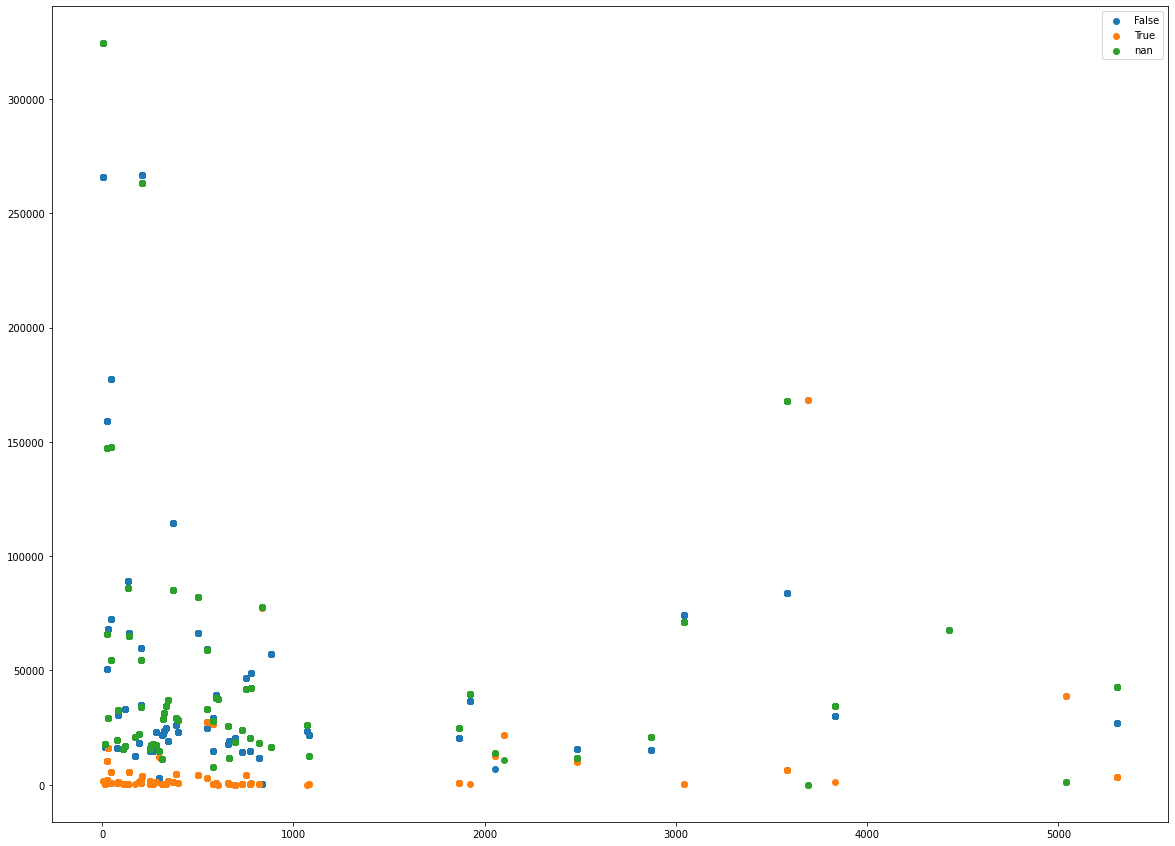

In [39]:
plt.figure(figsize=(20,15))
for name, group in tmp2.groupby("is_canceled"):
    plt.scatter(group["customer_id"], group["customer_price_total"], label=name)
plt.legend()
plt.show()

In [40]:
df[df.customer_id == 5040][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']] # excluded earlier

,invoice,description,invoice_date,price_total,customer_id,is_canceled
350593,39258,PICNIC BASKET WICKER 60 PIECES,2011-06-10 15:28:00,38970.000000,5040,False
350594,39260,Manual,2011-06-10 15:31:00,38976.000000,5040,True
871066,39257,PICNIC BASKET WICKER SMALL,2011-06-10 15:22:00,296.953125,5040,NaN
871076,39261,PICNIC BASKET WICKER 60 PIECES,2011-06-10 15:33:00,649.500000,5040,NaN
871086,39263,PICNIC BASKET WICKER SMALL,2011-06-10 15:39:00,296.953125,5040,NaN


In [41]:
df[df.customer_id == 3689][['invoice', 'description', 'invoice_date', 'price_total', 'customer_id', 'is_canceled']] # excluded earlier

,invoice,description,invoice_date,price_total,customer_id,is_canceled
503269,53587,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:15:00,168475.927734,3689,False
503270,53588,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,168475.927734,3689,True
689792,21370,This is a test product.,2010-10-04 16:38:00,9.000000,3689,NaN
856320,37590,PANTRY SCRUBBING BRUSH,2011-05-18 09:52:00,1.650391,3689,NaN
856321,37590,PANTRY PASTRY BRUSH,2011-05-18 09:52:00,1.250000,3689,NaN


In [0]:
### TEST TEST TEST

In [0]:
# 0 INOVICE PRICE TOTAL to False
tmp = df.copy() 
tmp = aggregate_by(df, 'invoice', 'price_total', 'invoice_price_total', np.sum)
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(tmp[tmp.invoice_price_total <= 0].invoice.unique())]], ignore_index=True)

In [0]:
# AMAZON FEE set to True

In [0]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(tmp[tmp.description == 'AMAZON FEE'].invoice.unique())]], ignore_index=True)

REMOVE OUTLIERS

In [0]:
# df_to_drop.head()

In [0]:
df = df[~df.invoice.isin(df_to_drop.invoice)]

In [48]:
gc.collect()  # release memory

13222

**EDA - DESCRIPTION**

In [0]:
to_check = df[df.description.map(lambda x: regex.sub('[^a-zA-Z]*', '', str(x).upper()) != regex.sub('[^a-zA-Z]*', '', str(x)))].description.map(lambda x: regex.sub('[^a-zA-Z ]*', '', str(x).lower()).strip()).unique()

In [50]:
sorted(to_check)

['adjustment by john on',
 'adjustment by peter on',
 'adjustment by peter on jun',
 'bag g swirly marbles',
 'bank charges',
 'boombox ipod classic',
 'chrome euro hook cm',
 'cruk commission',
 'dads cab electronic meter',
 'discount',
 'dotcomgiftshop gift voucher',
 'dr jams arouzer stress ball',
 'electronic talking breathaloser',
 'essential balm g tin in envelope',
 'flowers handbag blue and orange',
 'folk art greeting cardpack',
 'french blue metal door sign no',
 'glow in the dark shot glasses',
 'high resolution image',
 'hypochondriac pill stress ball',
 'manual',
 'next day carriage',
 'number tile cottage garden no',
 'number tile vintage font no',
 'polyester filler pad cmxcm',
 'polyester filler pad xcm',
 'set of  soldier skittles',
 'the king gift bag xxcm',
 'this is a test product',
 'traditional biscuit cutters  set',
 'usb office glitter lamp',
 'usb office mirror ball']

In [0]:
# df[df.description.map(lambda x: 'adjust' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [0]:
# df[df.description.map(lambda x: 'bank charges' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [53]:
df[df.description.map(lambda x: 'commission' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
920132,44036,5033,CRUK Commission,1,2011-08-30 10:49:00,1.599609,1.599609,5307,United Kingdom,NaN,True
398880,44359,5033,CRUK Commission,1,2011-09-02 15:45:00,13.007812,13.007812,5307,United Kingdom,True,False
928808,44805,5033,CRUK Commission,1,2011-09-09 15:17:00,15.960938,15.960938,5307,United Kingdom,NaN,True
405817,45025,5033,CRUK Commission,1,2011-09-13 12:32:00,52.250000,52.250000,5307,United Kingdom,True,False
411227,45633,5033,CRUK Commission,1,2011-09-21 14:40:00,608.500000,608.500000,5307,United Kingdom,True,False
942880,46061,5033,CRUK Commission,1,2011-09-26 15:28:00,447.500000,447.500000,5307,United Kingdom,NaN,True
423185,46557,5033,CRUK Commission,1,2011-10-03 09:57:00,361.500000,361.500000,5307,United Kingdom,True,False
956148,47351,5033,CRUK Commission,1,2011-10-10 17:12:00,412.000000,412.000000,5307,United Kingdom,NaN,True
962590,47868,5033,CRUK Commission,1,2011-10-17 13:31:00,496.000000,496.000000,5307,United Kingdom,NaN,True
443667,48481,5033,CRUK Commission,1,2011-10-24 17:07:00,425.250000,425.250000,5307,United Kingdom,True,False


In [0]:
# df[df.description.map(lambda x: 'discount' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [0]:
# df[df.description.map(lambda x: 'manual' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [56]:
df[df.description.map(lambda x: 'test ' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
14377,1406,2821,This is a test product.,10,2009-12-14 08:34:00,4.5,45.0,836,United Kingdom,False,False
14575,1423,2821,This is a test product.,5,2009-12-14 11:00:00,4.5,22.5,836,United Kingdom,False,False
517791,1425,2821,This is a test product.,5,2009-12-14 11:02:00,4.5,22.5,836,United Kingdom,NaN,True
522755,1929,2821,This is a test product.,5,2009-12-18 10:47:00,4.5,22.5,836,United Kingdom,NaN,True
20635,1933,3001,This is a test product.,1,2009-12-18 10:55:00,1.0,1.0,836,United Kingdom,False,False
23455,2330,2821,This is a test product.,5,2010-01-04 09:24:00,4.5,22.5,836,United Kingdom,False,False
23456,2332,2821,This is a test product.,5,2010-01-04 09:53:00,4.5,22.5,836,United Kingdom,False,False
531001,2873,2821,This is a test product.,5,2010-01-14 13:50:00,4.5,22.5,836,United Kingdom,NaN,True
33577,3315,2821,This is a test product.,5,2010-01-22 13:30:00,4.5,22.5,836,United Kingdom,False,False
78316,8771,2821,This is a test product.,5,2010-04-12 09:52:00,4.5,22.5,1468,United Kingdom,False,False


In [0]:
# TODO: deep analysis of invoices with: AMAZON FEE, manual and bank charges

## FEATURES ENGINEERING

In [0]:
feats_out = []

DESCRIPTION

In [0]:
# repair stock code
df['description_cleaned'] = df.description
df['description_cleaned'] = df.description_cleaned.map(lambda x: regex.sub('[^a-zA-Z ]*', '', str(x).lower()).strip())
df['description_cleaned'] = df.description_cleaned.map(lambda x: regex.sub('[ ]+', ' ', x).strip())
df['description_cleaned'] = df.description_cleaned.map(lambda x: 'adjustment' if 'adjustment' in x else x)

In [60]:
print('{} vs {}'.format(len(df['description'].unique()), len(df['description_cleaned'].unique())))

5413 vs 5225


In [0]:
tmp = df[['stock_code', 'description_cleaned']].drop_duplicates('stock_code')
tmp.index = tmp.stock_code
tmp = tmp.drop('stock_code', axis=1)
dict_ = tmp.to_dict()['description_cleaned']
df['description_cleaned'] = df.stock_code.map(lambda x: dict_[x])

In [0]:
df['stock_code_new'] = df['description_cleaned'].factorize()[0]

In [63]:
print('{} vs {}'.format(len(df['stock_code'].unique()), len(df['stock_code_new'].unique())))

4930 vs 4663


In [0]:
# ???!!!

df['description_len'] = df['description'].map(lambda x: len(x))
df['description_cnt_whitespace'] = df['description'].map(lambda x: x.count(' '))

DATE

In [0]:
df['invoice_date_y'] = df.invoice_date.dt.year
df['invoice_date_m'] = df.invoice_date.dt.month
df['invoice_date_d'] = df.invoice_date.dt.day
df['invoice_date_h'] = df.invoice_date.dt.hour
df['invoice_date_min'] = df.invoice_date.dt.minute
df['invoice_date_dow'] = df.invoice_date.dt.dayofweek

In [0]:
# TODO: last day of month, holidays

COUNTRY

In [0]:
df['country_cat'] = df['country'].factorize()[0]

CUSTOMER ORDERS

In [0]:
df['cnt_customer_cancel'] = group_by_key(df, 'customer_id', np.sum).astype(np.int)
df['cnt_customer_not_cancel'] = group_by_key(df, 'customer_id', np.sum, reversed=True).astype(np.int)
df['cnt_customer_orders'] = group_by_key(df, 'customer_id', np.size).astype(np.int)
df['cnt_customer_cancel_perc'] = df['cnt_customer_cancel']/df['cnt_customer_orders']

df['cnt_customer_cancel_log'] = df.cnt_customer_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_customer_not_cancel_log'] = df.cnt_customer_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_customer_orders_log'] = df.cnt_customer_orders.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['cnt_customer_cancel', 'cnt_customer_not_cancel', 'cnt_customer_orders'] + ['cnt_customer_orders_log']

PRODUCTS ORDERS

In [0]:
stock_code = 'stock_code_new'

In [0]:
df['cnt_product_cancel'] = group_by_key(df, stock_code, np.sum).astype(np.int)
df['cnt_product_not_cancel'] = group_by_key(df, stock_code, np.sum, reversed=True).astype(np.int)
df['cnt_product_orders'] = group_by_key(df, stock_code, np.size).astype(np.int)
df['cnt_product_cancel_perc'] = df['cnt_product_cancel']/df['cnt_product_orders']

df['cnt_product_cancel_log'] = df.cnt_product_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_orders_log'] = df.cnt_product_orders.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_not_cancel_log'] = df.cnt_product_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

df['cnt_product_stock_cancel'] = group_by_key_alt(df, stock_code, 'quantity', np.sum).astype(np.int)
df['cnt_product_stock_not_cancel'] = group_by_key_alt(df, stock_code, 'quantity', np.sum, reversed=True).astype(np.int)
df['cnt_product_stock_cancel_perc'] = df['cnt_product_stock_cancel']/(df['cnt_product_stock_cancel'] + df['cnt_product_stock_not_cancel'])

df['cnt_product_stock_cancel_log'] = df.cnt_product_stock_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_stock_not_cancel_log'] = df.cnt_product_stock_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['cnt_product_cancel', 'cnt_product_not_cancel', 'cnt_product_orders', 'cnt_product_stock_cancel', 'cnt_product_stock_not_cancel'] + ['cnt_product_orders_log']

AGGREGATIONS

In [0]:
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_sum', agg_fun=np.sum)

df['price_unit_log'] = df.price_unit.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_min_log'] = df.price_unit_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_max_log'] = df.price_unit_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_mean_log'] = df.price_unit_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_median_log'] = df.price_unit_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_sum_log'] = df.price_unit_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_unit', 'price_unit_min', 'price_unit_max', 'price_unit_mean', 'price_unit_median', 'price_unit_sum']

In [0]:
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_sum', agg_fun=np.sum)

df['quantity_log'] = df.quantity.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_min_log'] = df.quantity_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_max_log'] = df.quantity_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_mean_log'] = df.quantity_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_median_log'] = df.quantity_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_sum_log'] = df.quantity_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['quantity', 'quantity_min', 'quantity_max', 'quantity_mean', 'quantity_median', 'quantity_sum']

In [0]:
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_sum', agg_fun=np.sum)

df['price_total_log'] = df.price_total.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_min_log'] = df.price_total_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_max_log'] = df.price_total_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_mean_log'] = df.price_total_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_median_log'] = df.price_total_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_sum_log'] = df.price_total_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_total', 'price_total_min', 'price_total_max', 'price_total_mean', 'price_total_median', 'price_total_sum']

OTHERS

In [0]:
# CHEAP OR EXPENSIVE

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['price_unit'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['price_unit'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['price_unit_cheap_exp_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['price_unit']/dict_medians[x['description_cleaned']], axis=1)
df['price_unit_cheap_exp_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['price_unit']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['price_unit_cheap_exp_median_log'] = df.price_unit_cheap_exp_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_cheap_exp_mean_log'] = df.price_unit_cheap_exp_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_unit_cheap_exp_median', 'price_unit_cheap_exp_mean']

In [0]:
# LOW OR HIGH

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['quantity'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['quantity'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['quantity_low_high_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['quantity']/dict_medians[x['description_cleaned']], axis=1)
df['quantity_low_high_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['quantity']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['quantity_low_high_median_log'] = df.quantity_low_high_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_low_high_mean_log'] = df.quantity_low_high_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['quantity_low_high_median', 'quantity_low_high_mean']

In [0]:
# LOW OR HIGH

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['price_total'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['price_total'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['price_total_low_high_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['price_total']/dict_medians[x['description_cleaned']], axis=1)
df['price_total_low_high_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['price_total']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['price_total_low_high_median_log'] = df.price_total_low_high_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_low_high_mean_log'] = df.price_total_low_high_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_total_low_high_median', 'price_total_low_high_mean']

In [0]:
# TODO:

# whether a similar order was made up to several hours back

## TRAINING

In [0]:
train = df[~df['is_canceled'].isnull()].copy()
test  = df[df['is_canceled'].isnull()].copy()

del df

In [0]:
train['is_canceled'] = train['is_canceled'].astype('bool')

In [83]:
gc.collect()

0

In [0]:
# TRAIN + TEST_SUBMISSION

In [0]:
# TODO: some weights to stabilize mse_ref between groups
agg_invoices = train[['invoice', 'is_canceled']].groupby('invoice').\
  agg(is_canceled = ('is_canceled', np.sum)).reset_index().copy()
agg_invoices.is_canceled = agg_invoices.is_canceled.map(lambda x: 10 if x>=10 else x)

train_invoices, test_submission_invoices = \
    train_test_split(agg_invoices['invoice'], test_size=0.2,
    random_state=2020,
    stratify=agg_invoices['is_canceled'])

In [0]:
test_submission = train[train.invoice.isin(test_submission_invoices)]
train           = train[train.invoice.isin(train_invoices)]

In [87]:
dist(train)

Distribution:
detailed: [98.04600005  1.95399995] vs orders: [82.89876108 17.10123892]


In [88]:
dist(test_submission)

Distribution:
detailed: [98.11467899  1.88532101] vs orders: [82.89446403 17.10553597]


### XGBoost

In [0]:
params = {
    'params': {
      'max_depth' : hp.choice('max_depth', range(1, 16, 1)),
      'learning_rate' : hp.quniform('learning_rate', 0.01, 0.3, 0.02),
      'n_estimators' : hp.choice('n_estimators', range(50, 200, 10)),
      'gamma' : hp.quniform('gamma', 0, 1, 0.1),
      'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
      'min_child_weight' : hp.quniform('min_child_weight', 1, 80, 5),
      'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
      'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.05),
      'seed': 2020,
      'tree_method': 'gpu_hist',
      'objective': 'binary:logistic', 
    },
    'threshold': hp.quniform('threshold', 0.015, 0.025, 0.001)
}

feats = get_feats(train, feats_out)
model = xgb.XGBClassifier

best = optimization(params, 10)

Training with params: 
{'colsample_bytree': 0.1, 'eta': 0.25, 'gamma': 0.1, 'learning_rate': 0.02, 'max_depth': 12, 'min_child_weight': 70.0, 'n_estimators': 120, 'objective': 'binary:logistic', 'seed': 2020, 'subsample': 0.6900000000000001, 'tree_method': 'gpu_hist'}
0.016
FEATURES:

 ['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_product_cancel_perc', 'cnt_product_cancel_log', 'cnt_product_not_cancel_log', 'cnt_product_stock_cancel_perc', 'cnt_product_stock_cancel_log', 'cnt_product_stock_not_cancel_log', 'price_unit_log', 'price_unit_min_log', 'price_unit_max_log', 'price_unit_mean_log', 'price_unit_median_log', 'price_unit_sum_log', 'quantity_log', 'quantity_min_log', 'quantity_max_log', 'quantity_mean_log',

In [0]:
best

{'params': {'colsample_bytree': 0.2,
  'eta': 0.275,
  'gamma': 0.2,
  'learning_rate': 0.22,
  'max_depth': 11,
  'min_child_weight': 80.0,
  'n_estimators': 100,
  'objective': 'binary:logistic',
  'seed': 2020,
  'subsample': 0.5,
  'tree_method': 'gpu_hist'},
 'threshold': 0.018000000000000002}

In [0]:
# ELI5
params = {
    'params': {
        'colsample_bytree': 0.2,
        'eta': 0.275,
        'gamma': 0.2,
        'learning_rate': 0.22,
        'max_depth': 11,
        'min_child_weight': 80.0,
        'n_estimators': 100,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.5,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.018
}
plot_feature_importances(train, xgb.XGBClassifier, params['params'], get_feats(train, feats_out))

['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_product_cancel_perc', 'cnt_product_cancel_log', 'cnt_product_not_cancel_log', 'cnt_product_stock_cancel_perc', 'cnt_product_stock_cancel_log', 'cnt_product_stock_not_cancel_log', 'price_unit_log', 'price_unit_min_log', 'price_unit_max_log', 'price_unit_mean_log', 'price_unit_median_log', 'price_unit_sum_log', 'quantity_log', 'quantity_min_log', 'quantity_max_log', 'quantity_mean_log', 'quantity_median_log', 'quantity_sum_log', 'price_total_log', 'price_total_min_log', 'price_total_max_log', 'price_total_mean_log', 'price_total_median_log', 'price_total_sum_log', 'price_unit_cheap_exp_median_log', 'price_unit_cheap_exp_mean_log', 'quantity_low_high_median_log', 'quan

Weight,Feature
0.0061 ± 0.0000,price_total_sum_log
0.0059 ± 0.0000,quantity_sum_log
0.0042 ± 0.0001,cnt_customer_cancel_log
0.0040 ± 0.0001,price_unit_sum_log
0.0037 ± 0.0002,cnt_customer_cancel_perc
0.0028 ± 0.0001,cnt_product_cancel_perc
0.0012 ± 0.0001,price_unit_max_log
0.0011 ± 0.0001,cnt_product_stock_cancel_perc
0.0008 ± 0.0000,price_unit_min_log
0.0007 ± 0.0000,quantity_max_log


In [0]:
feats_eli = ['price_total_sum_log','quantity_sum_log','cnt_customer_cancel_log','price_unit_sum_log','cnt_customer_cancel_perc','cnt_product_cancel_perc','price_unit_max_log','cnt_product_stock_cancel_perc','price_unit_min_log','quantity_max_log','quantity_mean_log','cnt_product_cancel_log','price_unit_median_log','price_total_low_high_median_log','quantity_median_log','quantity_log',]

In [0]:
params = {
    'params': {
      'max_depth' : hp.choice('max_depth', range(1, 16, 1)),
      'learning_rate' : hp.quniform('learning_rate', 0.01, 0.3, 0.02),
      'n_estimators' : hp.choice('n_estimators', range(50, 200, 10)),
      'gamma' : hp.quniform('gamma', 0, 1, 0.1),
      'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
      'min_child_weight' : hp.quniform('min_child_weight', 1, 80, 5),
      'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
      'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.05),
      'seed': 2020,
      'tree_method': 'gpu_hist',
      'objective': 'binary:logistic', 
    },
    'threshold': hp.quniform('threshold', 0.015, 0.025, 0.001)
}

feats = feats_eli
model = xgb.XGBClassifier

best = optimization(params, 30)

Training with params: 
{'colsample_bytree': 0.30000000000000004, 'eta': 0.375, 'gamma': 0.9, 'learning_rate': 0.08, 'max_depth': 11, 'min_child_weight': 0.0, 'n_estimators': 60, 'objective': 'binary:logistic', 'seed': 2020, 'subsample': 0.62, 'tree_method': 'gpu_hist'}
0.02
FEATURES:

 ['price_total_sum_log', 'quantity_sum_log', 'cnt_customer_cancel_log', 'price_unit_sum_log', 'cnt_customer_cancel_perc', 'cnt_product_cancel_perc', 'price_unit_max_log', 'cnt_product_stock_cancel_perc', 'price_unit_min_log', 'quantity_max_log', 'quantity_mean_log', 'cnt_product_cancel_log', 'price_unit_median_log', 'price_total_low_high_median_log', 'quantity_median_log', 'quantity_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [80.74231507 19.25768493]
MSE vs MSE REF 53246.55286071999 vs 85956.78782528281 (0.6194572203995083)
mse: 
0.6194572203995083
SCORE: 0.6194572203995083
---------------

In [0]:
best

{'params': {'colsample_bytree': 0.25,
  'eta': 0.15000000000000002,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.26,
  'max_depth': 5,
  'min_child_weight': 50.0,
  'n_estimators': 80,
  'objective': 'binary:logistic',
  'seed': 2020,
  'subsample': 0.8,
  'tree_method': 'gpu_hist'},
 'threshold': 0.02}

FEATURES:

 ['price_total_sum_log', 'quantity_sum_log', 'cnt_customer_cancel_log', 'price_unit_sum_log', 'cnt_customer_cancel_perc', 'cnt_product_cancel_perc', 'price_unit_max_log', 'cnt_product_stock_cancel_perc', 'price_unit_min_log', 'quantity_max_log', 'quantity_mean_log', 'cnt_product_cancel_log', 'price_unit_median_log', 'price_total_low_high_median_log', 'quantity_median_log', 'quantity_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [83.81110362 16.18889638]
MSE vs MSE REF 35021.42520651414 vs 85956.78782528281 (0.40743059498336853)
mse:  0.40743059498336853


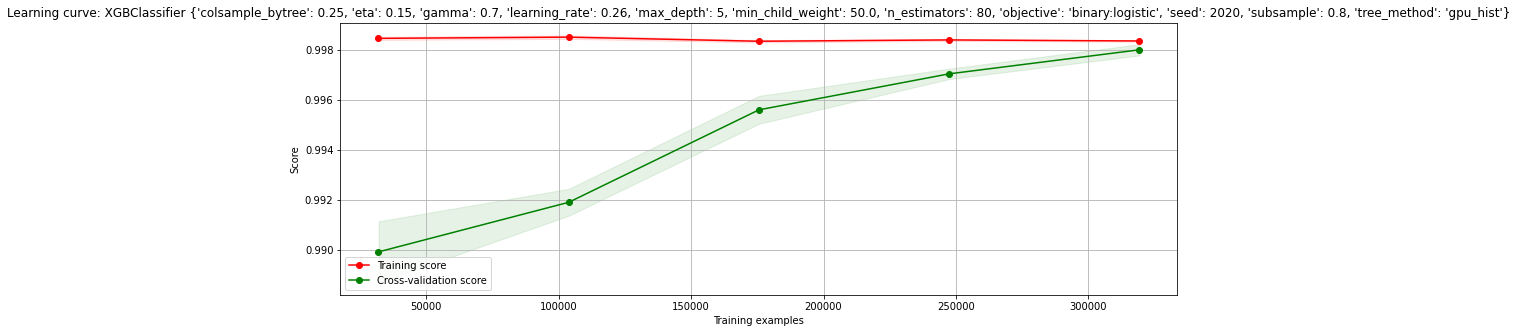

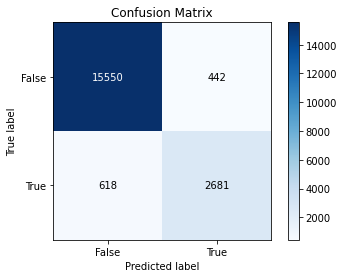

In [0]:
# TEST SUBMIT
feats = feats_eli
params = {
    'params': {
        'colsample_bytree': 0.25,
        'eta': 0.15,
        'gamma': 0.7,
        'learning_rate': 0.26,
        'max_depth': 5,
        'min_child_weight': 50.0,
        'n_estimators': 80,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.8,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.02
}

### run

score, e = run_model(train, xgb.XGBClassifier, params['params'], feats, submit_set=test_submission, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [0]:
custom_error(e, p=True)

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89446403 17.10553597]
target_pred distribution
Distribution:
orders: [83.49574953 16.50425047]
MSE vs MSE REF 25890.079726767075 vs 76771.89673162917 (0.33723381639600225)


0.33723381639600225

FEATURES:

 ['price_total_sum_log', 'quantity_sum_log', 'cnt_customer_cancel_log', 'price_unit_sum_log', 'cnt_customer_cancel_perc', 'cnt_product_cancel_perc', 'price_unit_max_log', 'cnt_product_stock_cancel_perc', 'price_unit_min_log', 'quantity_max_log', 'quantity_mean_log', 'cnt_product_cancel_log', 'price_unit_median_log', 'price_total_low_high_median_log', 'quantity_median_log', 'quantity_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [83.81110362 16.18889638]
MSE vs MSE REF 35021.42520651414 vs 85956.78782528281 (0.40743059498336853)
mse:  0.40743059498336853


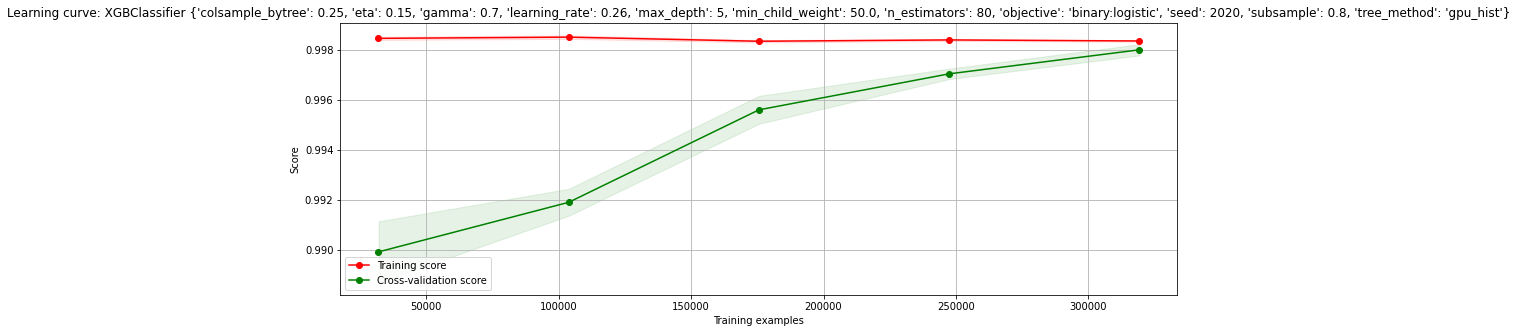

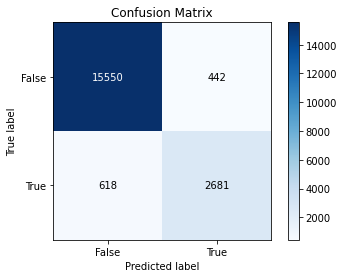

In [139]:
# SUBMISSION XGBOOST: ELI + HYPEROPT
# PRIVATE SCORE: 40251.81866

feats = ['price_total_sum_log','quantity_sum_log','cnt_customer_cancel_log','price_unit_sum_log','cnt_customer_cancel_perc','cnt_product_cancel_perc','price_unit_max_log','cnt_product_stock_cancel_perc','price_unit_min_log','quantity_max_log','quantity_mean_log','cnt_product_cancel_log','price_unit_median_log','price_total_low_high_median_log','quantity_median_log','quantity_log',]
params = {
    'params': {
        'colsample_bytree': 0.25,
        'eta': 0.15,
        'gamma': 0.7,
        'learning_rate': 0.26,
        'max_depth': 5,
        'min_child_weight': 50.0,
        'n_estimators': 80,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.8,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.02
}

### run

score, e = run_model(train, xgb.XGBClassifier, params['params'], feats, submit_set=test, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [0]:
update_submit_set(df_to_drop, e, 'submission_final_xgboost_eli_hyperopt.csv') 

,invoice,is_canceled,price_total,total_return
2602,0,False,505.273438,0
2603,1,False,145.828125,0
2604,6,False,50.406250,0
2605,7,False,344.314453,0
2606,11,False,308.447266,0
...,...,...,...,...
26809,53617,False,277.057617,0
26810,53618,False,848.528320,0
26811,53619,False,903.623047,0
26812,53622,False,29.882812,0


## LGBM

In [177]:
params = {
    'params': {
        'class_weight': 'balanced', #hp.choice('class_weight', [None, 'balanced']),
        # 'boosting_type': hp.choice('boosting_type', 
        #                            [{'boosting_type': 'gbdt', 
        #                                 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
        #                              {'boosting_type': 'dart', 
        #                                  'subsample': hp.uniform('dart_subsample', 0.5, 1)},
        #                              {'boosting_type': 'goss'}]),
        'num_leaves': hp.choice('num_leaves', range(30, 200, 10)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        # 'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000, dtype=int),
        'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
        'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
        'max_bin': hp.choice('max_bin', range(50, 200, 10)),
        'min_data_in_leaf': hp.choice('min_data_in_leaf', range(5, 30, 1)),
        # 'min_sum_hessian_in_leaf': 0.00245,
        # 'bagging_fraction': 1.0,
        'bagging_freq': hp.choice('bagging_freq', range(1, 15, 1)),
        # 'feature_fraction': 0.05,
        # 'lambda_l1': 4.972,
        # 'lambda_l2': 2.276,
        # 'min_gain_to_split': 0.65,
        'max_depth': hp.choice('max_depth', range(1, 16, 1)),
        # 'save_binary': True,
        'seed': 2020,
        'feature_fraction_seed': 2020,
        'bagging_seed': 2020,
        'drop_seed': 2020,
        'data_random_seed': 2020,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': "auc",
        'is_unbalance': True,
        'boost_from_average': False,
    },
    'threshold': hp.quniform('threshold', 0.05, 0.15, 0.005)
}

feats = get_feats(train, feats_out)
model = lgb.LGBMClassifier

best = optimization(params, 100)

Training with params: 
{'bagging_freq': 14, 'bagging_seed': 2020, 'boost_from_average': False, 'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.7030806710204991, 'data_random_seed': 2020, 'drop_seed': 2020, 'feature_fraction_seed': 2020, 'is_unbalance': True, 'learning_rate': 0.05778611796127799, 'max_bin': 170, 'max_depth': 6, 'metric': 'auc', 'min_child_samples': 345.0, 'min_data_in_leaf': 10, 'num_leaves': 100, 'objective': 'binary', 'reg_alpha': 0.096623180123111, 'reg_lambda': 0.32316921636599105, 'seed': 2020, 'verbose': 1}
0.13
FEATURES:

 ['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_product_cancel_perc', 'cnt_product_cancel_log', 'cnt_product_not_cancel_log', 'cnt_product_stoc

In [0]:
best

In [89]:
# ELI5
params = {
    'params': {
        'bagging_freq': 12, 
        'bagging_seed': 2020, 
        'boost_from_average': False, 
        'boosting_type': 'gbdt', 
        'class_weight': 'balanced', 
        'colsample_bytree': 0.7698932070306236, 
        'data_random_seed': 2020, 
        'drop_seed': 2020, 
        'feature_fraction_seed': 2020,
        'is_unbalance': True, 
        'learning_rate': 0.1964812345303815, 
        'max_bin': 50, 
        'max_depth': 15, 
        'metric': 'auc', 
        'min_child_samples': 255.0, 
        'min_data_in_leaf': 27,
        'num_leaves': 50, 
        'objective': 'binary', 
        'reg_alpha': 0.7858549195894013, 
        'reg_lambda': 0.34421244697975045, 
        'seed': 2020,
        'verbose': 1
    },
    'threshold': 0.14
}
plot_feature_importances(train, lgb.LGBMClassifier, params['params'], get_feats(train, feats_out))

['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_product_cancel_perc', 'cnt_product_cancel_log', 'cnt_product_not_cancel_log', 'cnt_product_stock_cancel_perc', 'cnt_product_stock_cancel_log', 'cnt_product_stock_not_cancel_log', 'price_unit_log', 'price_unit_min_log', 'price_unit_max_log', 'price_unit_mean_log', 'price_unit_median_log', 'price_unit_sum_log', 'quantity_log', 'quantity_min_log', 'quantity_max_log', 'quantity_mean_log', 'quantity_median_log', 'quantity_sum_log', 'price_total_log', 'price_total_min_log', 'price_total_max_log', 'price_total_mean_log', 'price_total_median_log', 'price_total_sum_log', 'price_unit_cheap_exp_median_log', 'price_unit_cheap_exp_mean_log', 'quantity_low_high_median_log', 'quan

Weight,Feature
0.0130 ± 0.0002,cnt_customer_cancel_perc
0.0087 ± 0.0001,cnt_customer_cancel_log
0.0036 ± 0.0001,price_total_sum_log
0.0033 ± 0.0000,price_unit_sum_log
0.0022 ± 0.0002,cnt_product_cancel_perc
0.0019 ± 0.0001,customer_id
0.0017 ± 0.0001,cnt_customer_not_cancel_log
0.0015 ± 0.0001,quantity_sum_log
0.0013 ± 0.0001,price_total_min_log
0.0010 ± 0.0000,invoice_date_min


In [94]:
params = {
    'params': {
        'class_weight': 'balanced', #hp.choice('class_weight', [None, 'balanced']),
        # 'boosting_type': hp.choice('boosting_type', 
        #                            [{'boosting_type': 'gbdt', 
        #                                 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
        #                              {'boosting_type': 'dart', 
        #                                  'subsample': hp.uniform('dart_subsample', 0.5, 1)},
        #                              {'boosting_type': 'goss'}]),
        'num_leaves': hp.choice('num_leaves', range(30, 200, 10)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        # 'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000, dtype=int),
        'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
        'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
        'max_bin': hp.choice('max_bin', range(50, 200, 10)),
        'min_data_in_leaf': hp.choice('min_data_in_leaf', range(5, 30, 1)),
        # 'min_sum_hessian_in_leaf': 0.00245,
        # 'bagging_fraction': 1.0,
        'bagging_freq': hp.choice('bagging_freq', range(1, 15, 1)),
        # 'feature_fraction': 0.05,
        # 'lambda_l1': 4.972,
        # 'lambda_l2': 2.276,
        # 'min_gain_to_split': 0.65,
        'max_depth': hp.choice('max_depth', range(1, 16, 1)),
        # 'save_binary': True,
        'seed': 2020,
        'feature_fraction_seed': 2020,
        'bagging_seed': 2020,
        'drop_seed': 2020,
        'data_random_seed': 2020,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': "auc",
        'is_unbalance': True,
        'boost_from_average': False,
    },
    'threshold': hp.quniform('threshold', 0.1, 0.2, 0.01)
}

feats = feats_eli
model = lgb.LGBMClassifier

best = optimization(params, 30)

Training with params: 
{'bagging_freq': 9, 'bagging_seed': 2020, 'boost_from_average': False, 'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.972317099994953, 'data_random_seed': 2020, 'drop_seed': 2020, 'feature_fraction_seed': 2020, 'is_unbalance': True, 'learning_rate': 0.04774072585605126, 'max_bin': 50, 'max_depth': 14, 'metric': 'auc', 'min_child_samples': 400.0, 'min_data_in_leaf': 7, 'num_leaves': 160, 'objective': 'binary', 'reg_alpha': 0.9692489647651176, 'reg_lambda': 0.49926130403831404, 'seed': 2020, 'verbose': 1}
0.12
FEATURES:

 ['cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_cancel_perc', 'customer_id', 'cnt_customer_not_cancel_log', 'quantity_sum_log', 'price_total_min_log', 'invoice_date_min', 'invoice_date_h', 'invoice_date_d', 'price_total_median_log', 'invoice', 'invoice_date_dow', 'invoice_date_m', 'price_unit_max_log', 'quantity_min_log'] 

CUSTOM CV

calc_custom_error su

In [95]:
best

{'params': {'bagging_freq': 14,
  'bagging_seed': 2020,
  'boost_from_average': False,
  'boosting_type': 'gbdt',
  'class_weight': 'balanced',
  'colsample_bytree': 0.6153015369682461,
  'data_random_seed': 2020,
  'drop_seed': 2020,
  'feature_fraction_seed': 2020,
  'is_unbalance': True,
  'learning_rate': 0.1717193042530983,
  'max_bin': 180,
  'max_depth': 15,
  'metric': 'auc',
  'min_child_samples': 350.0,
  'min_data_in_leaf': 26,
  'num_leaves': 170,
  'objective': 'binary',
  'reg_alpha': 0.8373444156133808,
  'reg_lambda': 0.9352795529096269,
  'seed': 2020,
  'verbose': 1},
 'threshold': 0.2}

FEATURES:

 ['cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_cancel_perc', 'customer_id', 'cnt_customer_not_cancel_log', 'quantity_sum_log', 'price_total_min_log', 'invoice_date_min', 'invoice_date_h', 'invoice_date_d', 'price_total_median_log', 'invoice', 'invoice_date_dow', 'invoice_date_m', 'price_unit_max_log', 'quantity_min_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [81.71167902 18.28832098]
MSE vs MSE REF 42653.492656348724 vs 85956.78782528281 (0.4962201791794142)
mse:  0.4962201791794142


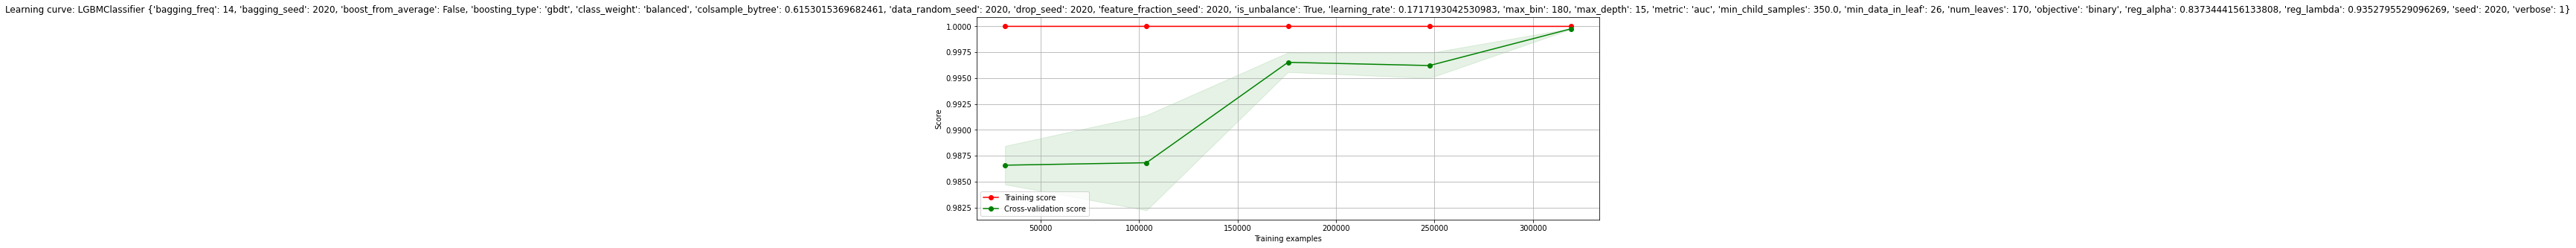

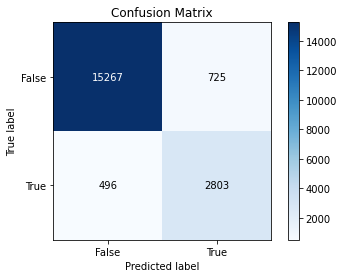

In [109]:
# TEST SUBMIT
feats = feats_eli
params = {
    'params': {
        'bagging_freq': 14,
        'bagging_seed': 2020,
        'boost_from_average': False,
        'boosting_type': 'gbdt',
        'class_weight': 'balanced',
        'colsample_bytree': 0.6153015369682461,
        'data_random_seed': 2020,
        'drop_seed': 2020,
        'feature_fraction_seed': 2020,
        'is_unbalance': True,
        'learning_rate': 0.1717193042530983,
        'max_bin': 180,
        'max_depth': 15,
        'metric': 'auc',
        'min_child_samples': 350.0,
        'min_data_in_leaf': 26,
        'num_leaves': 170,
        'objective': 'binary',
        'reg_alpha': 0.8373444156133808,
        'reg_lambda': 0.9352795529096269,
        'seed': 2020,
        'verbose': 1
    },
    'threshold': 0.2
}

### run

score, e = run_model(train, lgb.LGBMClassifier, params['params'], feats, submit_set=test_submission, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [110]:
custom_error(e, p=True)

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89446403 17.10553597]
target_pred distribution
Distribution:
orders: [81.56748911 18.43251089]
MSE vs MSE REF 157424.29967739395 vs 76771.89673162917 (2.050545920829606)


2.050545920829606

FEATURES:

 ['cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_cancel_perc', 'customer_id', 'cnt_customer_not_cancel_log', 'quantity_sum_log', 'price_total_min_log', 'invoice_date_min', 'invoice_date_h', 'invoice_date_d', 'price_total_median_log', 'invoice', 'invoice_date_dow', 'invoice_date_m', 'price_unit_max_log', 'quantity_min_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [81.71167902 18.28832098]
MSE vs MSE REF 42653.492656348724 vs 85956.78782528281 (0.4962201791794142)
mse:  0.4962201791794142


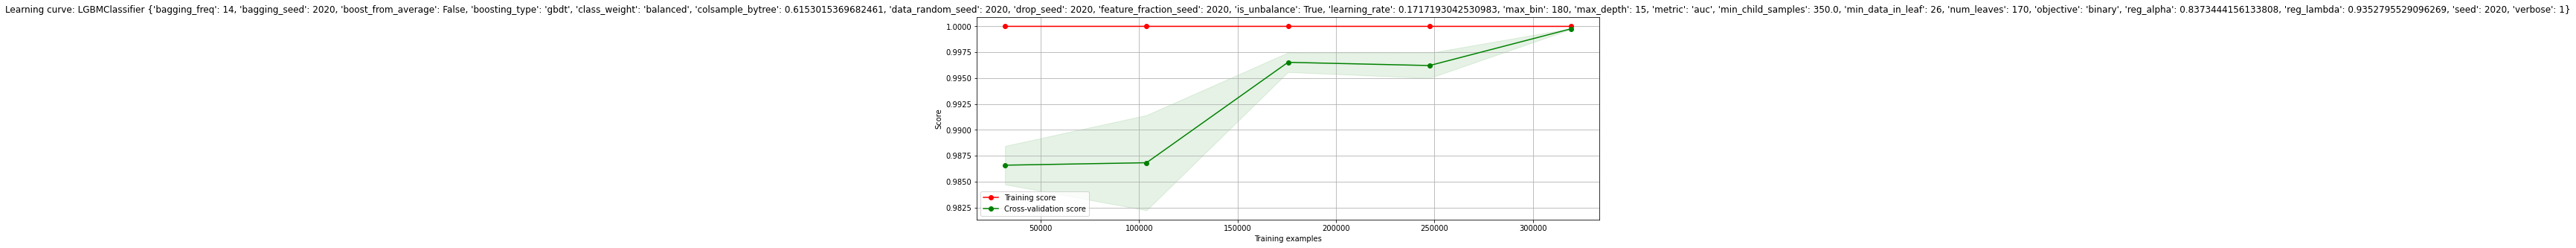

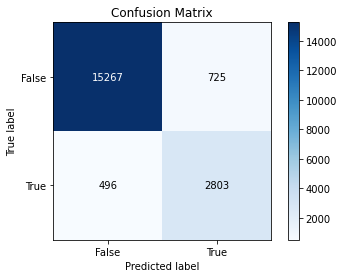

In [111]:
# SUBMISSION LGBM: ELI + HYPEROPT
# PRIVATE SCORE: 58362.29918

feats = ['cnt_customer_cancel_perc','cnt_customer_cancel_log','price_total_sum_log','price_unit_sum_log','cnt_product_cancel_perc','customer_id','cnt_customer_not_cancel_log','quantity_sum_log','price_total_min_log','invoice_date_min','invoice_date_h','invoice_date_d','price_total_median_log','invoice','invoice_date_dow','invoice_date_m','price_unit_max_log','quantity_min_log',]
params = {
    'params': {
        'bagging_freq': 14,
        'bagging_seed': 2020,
        'boost_from_average': False,
        'boosting_type': 'gbdt',
        'class_weight': 'balanced',
        'colsample_bytree': 0.6153015369682461,
        'data_random_seed': 2020,
        'drop_seed': 2020,
        'feature_fraction_seed': 2020,
        'is_unbalance': True,
        'learning_rate': 0.1717193042530983,
        'max_bin': 180,
        'max_depth': 15,
        'metric': 'auc',
        'min_child_samples': 350.0,
        'min_data_in_leaf': 26,
        'num_leaves': 170,
        'objective': 'binary',
        'reg_alpha': 0.8373444156133808,
        'reg_lambda': 0.9352795529096269,
        'seed': 2020,
        'verbose': 1
    },
    'threshold': 0.2
}

### run

score, e = run_model(train, lgb.LGBMClassifier, params['params'], feats, submit_set=test, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [108]:
update_submit_set(df_to_drop, e, 'submission_final_lgbm_eli_hyperopt.csv') 

,invoice,is_canceled,price_total,total_return
2602,0,False,505.273438,0
2603,1,False,145.828125,0
2604,6,False,50.406250,0
2605,7,False,344.314453,0
2606,11,False,308.447266,0
...,...,...,...,...
26809,53617,False,277.057617,0
26810,53618,False,848.528320,0
26811,53619,False,903.623047,0
26812,53622,False,29.882812,0


In [0]:
# LGBM based winner notebook

FEATURES:

 ['cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_cancel_perc', 'customer_id', 'cnt_customer_not_cancel_log', 'quantity_sum_log', 'price_total_min_log', 'invoice_date_min', 'invoice_date_h', 'invoice_date_d', 'price_total_median_log', 'invoice', 'invoice_date_dow', 'invoice_date_m', 'price_unit_max_log', 'quantity_min_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [82.12119641 17.87880359]
MSE vs MSE REF 48682.79635611971 vs 85956.78782528281 (0.5663636065027601)
mse:  0.5663636065027601
calc_custom_error summary:
target distribution
Distribution:
orders: [82.89446403 17.10553597]
target_pred distribution
Distribution:
orders: [82.08583869 17.91416131]
MSE vs MSE REF 25590.05941803775 vs 76771.89673162917 (0.3333258719332243)
FEATURES:

 ['cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'price

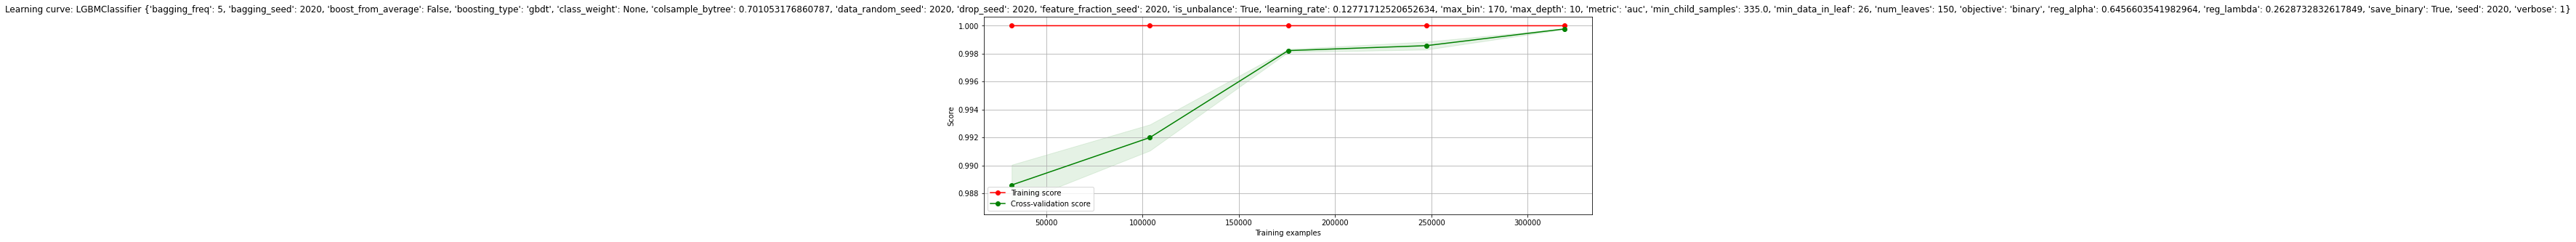

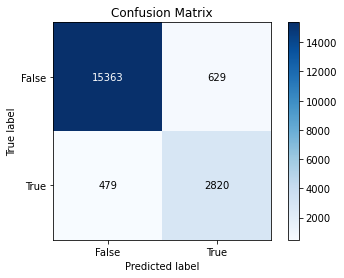

In [161]:
feats = ['cnt_customer_cancel_perc','cnt_customer_cancel_log','price_total_sum_log','price_unit_sum_log','cnt_product_cancel_perc','customer_id','cnt_customer_not_cancel_log','quantity_sum_log','price_total_min_log','invoice_date_min','invoice_date_h','invoice_date_d','price_total_median_log','invoice','invoice_date_dow','invoice_date_m','price_unit_max_log','quantity_min_log',]
params = {
    'params': {
        'bagging_freq': 5,
        'bagging_seed': 2020,
        'boost_from_average': False,
        'boosting_type': 'gbdt',
        'class_weight': None,
        'colsample_bytree': 0.701053176860787,
        'data_random_seed': 2020,
        'drop_seed': 2020,
        'feature_fraction_seed': 2020,
        'is_unbalance': True,
        'learning_rate': 0.12771712520652634,
        'max_bin': 170,
        'max_depth': 10,
        'metric': 'auc',
        'min_child_samples': 335.0,
        'min_data_in_leaf': 26,
        'num_leaves': 150,
        'objective': 'binary',
        'reg_alpha': 0.6456603541982964,
        'reg_lambda': 0.2628732832617849,
        'save_binary': True,
        'seed': 2020,
        'verbose': 1
    },
    'threshold': 0.18
}

### run

score, e = run_model(train, lgb.LGBMClassifier, params['params'], feats, submit_set=test_submission, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=False, is_plot_confusion_matrix=False)

custom_error(e, p=True)

score, e = run_model(train, lgb.LGBMClassifier, params['params'], feats, submit_set=test, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [0]:
# Problematics records!

In [168]:
e[e.invoice == 18583] # should be True

,invoice,price_total,is_canceled_pred,total_return_pred
8079,18583,18912.0,True,0.0


In [169]:
e.loc[e.invoice == 18583, 'is_canceled_pred'] = True
test[test.invoice == 18583]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test,description_cleaned,stock_code_new,description_len,description_cnt_whitespace,invoice_date_y,invoice_date_m,invoice_date_d,invoice_date_h,invoice_date_min,invoice_date_dow,country_cat,cnt_customer_cancel,cnt_customer_not_cancel,cnt_customer_orders,cnt_customer_cancel_perc,cnt_customer_cancel_log,cnt_customer_not_cancel_log,cnt_customer_orders_log,cnt_product_cancel,cnt_product_not_cancel,cnt_product_orders,cnt_product_cancel_perc,cnt_product_cancel_log,cnt_product_orders_log,cnt_product_not_cancel_log,cnt_product_stock_cancel,cnt_product_stock_not_cancel,cnt_product_stock_cancel_perc,cnt_product_stock_cancel_log,...,price_unit_log,price_unit_min_log,price_unit_max_log,price_unit_mean_log,price_unit_median_log,price_unit_sum_log,quantity_min,quantity_max,quantity_mean,quantity_median,quantity_sum,quantity_log,quantity_min_log,quantity_max_log,quantity_mean_log,quantity_median_log,quantity_sum_log,price_total_min,price_total_max,price_total_mean,price_total_median,price_total_sum,price_total_log,price_total_min_log,price_total_max_log,price_total_mean_log,price_total_median_log,price_total_sum_log,price_unit_cheap_exp_median,price_unit_cheap_exp_mean,price_unit_cheap_exp_median_log,price_unit_cheap_exp_mean_log,quantity_low_high_median,quantity_low_high_mean,quantity_low_high_median_log,quantity_low_high_mean_log,price_total_low_high_median,price_total_low_high_mean,price_total_low_high_median_log,price_total_low_high_mean_log
660347,18583,2535,Bank Charges,1,2010-08-27 13:42:00,18912.0,18912.0,-1,United Kingdom,NaN,True,bank charges,2083,12,1,2010,8,27,13,42,4,0,-1,-1,-1,1.0,0.0,0.0,0.0,44,15,59,0.745763,3.806662,4.094345,2.772589,54,15,0.782609,4.007333,...,9.847605,9.847605,9.847605,9.847605,9.847605,9.847605,1,1,1.0,1.0,1,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,18912.0,18912.0,18912.0,18912.0,18912.0,9.847605,9.847605,9.847605,9.847605,9.847605,9.847605,146.46273,77.23124,4.993575,4.359669,1.0,0.855072,0.693147,0.617924,146.46273,77.184344,4.993575,4.359069


In [170]:
e[e.invoice == 20642] # should be True

,invoice,price_total,is_canceled_pred,total_return_pred
9046,20642,10472.0,True,0.0


In [171]:
e.loc[e.invoice == 20642, 'is_canceled_pred'] = True
test[test.invoice == 20642]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test,description_cleaned,stock_code_new,description_len,description_cnt_whitespace,invoice_date_y,invoice_date_m,invoice_date_d,invoice_date_h,invoice_date_min,invoice_date_dow,country_cat,cnt_customer_cancel,cnt_customer_not_cancel,cnt_customer_orders,cnt_customer_cancel_perc,cnt_customer_cancel_log,cnt_customer_not_cancel_log,cnt_customer_orders_log,cnt_product_cancel,cnt_product_not_cancel,cnt_product_orders,cnt_product_cancel_perc,cnt_product_cancel_log,cnt_product_orders_log,cnt_product_not_cancel_log,cnt_product_stock_cancel,cnt_product_stock_not_cancel,cnt_product_stock_cancel_perc,cnt_product_stock_cancel_log,...,price_unit_log,price_unit_min_log,price_unit_max_log,price_unit_mean_log,price_unit_median_log,price_unit_sum_log,quantity_min,quantity_max,quantity_mean,quantity_median,quantity_sum,quantity_log,quantity_min_log,quantity_max_log,quantity_mean_log,quantity_median_log,quantity_sum_log,price_total_min,price_total_max,price_total_mean,price_total_median,price_total_sum,price_total_log,price_total_min_log,price_total_max_log,price_total_mean_log,price_total_median_log,price_total_sum_log,price_unit_cheap_exp_median,price_unit_cheap_exp_mean,price_unit_cheap_exp_median_log,price_unit_cheap_exp_mean_log,quantity_low_high_median,quantity_low_high_mean,quantity_low_high_median_log,quantity_low_high_mean_log,price_total_low_high_median,price_total_low_high_mean,price_total_low_high_median_log,price_total_low_high_mean_log
679491,20642,1232,Manual,1,2010-09-27 16:16:00,10472.0,10472.0,-1,United Kingdom,NaN,True,manual,927,6,0,2010,9,27,16,16,0,0,-1,-1,-1,1.0,0.0,0.0,0.0,256,421,677,0.378139,5.549076,6.519147,6.045005,2111,5524,0.27649,7.655391,...,9.256556,9.256556,9.256556,9.256556,9.256556,9.256556,1,1,1.0,1.0,1,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,10472.0,10472.0,10472.0,10472.0,10472.0,9.256556,9.256556,9.256556,9.256556,9.256556,9.256556,732.868234,17.438801,6.598329,2.914457,1.0,0.088671,0.693147,0.084957,478.03709,17.278561,6.171778,2.905729


In [172]:
e[e.invoice == 9026] # should be False

,invoice,price_total,is_canceled_pred,total_return_pred
3843,9026,5844.0,False,5844.0


In [173]:
e.loc[e.invoice == 9026, 'is_canceled_pred'] = False
test[test.invoice == 9026]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test,description_cleaned,stock_code_new,description_len,description_cnt_whitespace,invoice_date_y,invoice_date_m,invoice_date_d,invoice_date_h,invoice_date_min,invoice_date_dow,country_cat,cnt_customer_cancel,cnt_customer_not_cancel,cnt_customer_orders,cnt_customer_cancel_perc,cnt_customer_cancel_log,cnt_customer_not_cancel_log,cnt_customer_orders_log,cnt_product_cancel,cnt_product_not_cancel,cnt_product_orders,cnt_product_cancel_perc,cnt_product_cancel_log,cnt_product_orders_log,cnt_product_not_cancel_log,cnt_product_stock_cancel,cnt_product_stock_not_cancel,cnt_product_stock_cancel_perc,cnt_product_stock_cancel_log,...,price_unit_log,price_unit_min_log,price_unit_max_log,price_unit_mean_log,price_unit_median_log,price_unit_sum_log,quantity_min,quantity_max,quantity_mean,quantity_median,quantity_sum,quantity_log,quantity_min_log,quantity_max_log,quantity_mean_log,quantity_median_log,quantity_sum_log,price_total_min,price_total_max,price_total_mean,price_total_median,price_total_sum,price_total_log,price_total_min_log,price_total_max_log,price_total_mean_log,price_total_median_log,price_total_sum_log,price_unit_cheap_exp_median,price_unit_cheap_exp_mean,price_unit_cheap_exp_median_log,price_unit_cheap_exp_mean_log,quantity_low_high_median,quantity_low_high_mean,quantity_low_high_median_log,quantity_low_high_mean_log,price_total_low_high_median,price_total_low_high_mean,price_total_low_high_median_log,price_total_low_high_mean_log
578980,9026,1232,Manual,1,2010-04-15 14:12:00,5844.0,5844.0,-1,United Kingdom,NaN,True,manual,927,6,0,2010,4,15,14,12,3,0,-1,-1,-1,1.0,0.0,0.0,0.0,256,421,677,0.378139,5.549076,6.519147,6.045005,2111,5524,0.27649,7.655391,...,8.673342,8.673342,8.673342,8.673342,8.673342,8.673342,1,1,1.0,1.0,1,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,5844.0,5844.0,5844.0,5844.0,5844.0,8.673342,8.673342,8.673342,8.673342,8.673342,8.673342,408.984144,9.73189,6.016118,2.37322,1.0,0.088671,0.693147,0.084957,266.773181,9.642467,5.59014,2.364852


In [0]:
t = update_submit_set(df_to_drop, e, 'submission_final_lgbm_eli_hyperopt_based_winner_params.csv') 

In [176]:
sum(t.total_return*t.total_return)/len(t)*0.3

39404.496054175754

FEATURES:

 ['price_total_sum_log', 'quantity_sum_log', 'cnt_customer_cancel_log', 'price_unit_sum_log', 'cnt_customer_cancel_perc', 'cnt_product_cancel_perc', 'price_unit_max_log', 'cnt_product_stock_cancel_perc', 'price_unit_min_log', 'quantity_max_log', 'quantity_mean_log', 'cnt_product_cancel_log', 'price_unit_median_log', 'price_total_low_high_median_log', 'quantity_median_log', 'quantity_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.89876108 17.10123892]
target_pred distribution
Distribution:
orders: [83.81110362 16.18889638]
MSE vs MSE REF 35021.42520651414 vs 85956.78782528281 (0.40743059498336853)
mse:  0.40743059498336853
calc_custom_error summary:
target distribution
Distribution:
orders: [82.89446403 17.10553597]
target_pred distribution
Distribution:
orders: [83.49574953 16.50425047]
MSE vs MSE REF 25890.079726767075 vs 76771.89673162917 (0.33723381639600225)
FEATURES:

 ['price_total_sum_log', 'quantity_sum_log', 'cnt_customer

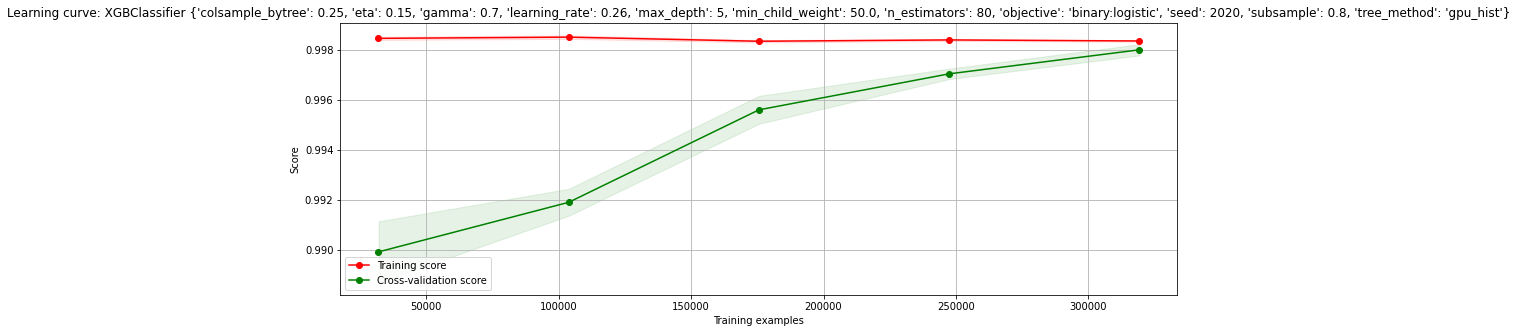

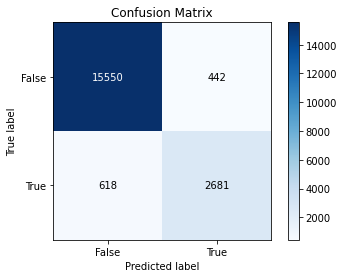

In [177]:
# XGBoost boosted

feats = ['price_total_sum_log','quantity_sum_log','cnt_customer_cancel_log','price_unit_sum_log','cnt_customer_cancel_perc','cnt_product_cancel_perc','price_unit_max_log','cnt_product_stock_cancel_perc','price_unit_min_log','quantity_max_log','quantity_mean_log','cnt_product_cancel_log','price_unit_median_log','price_total_low_high_median_log','quantity_median_log','quantity_log',]
params = {
    'params': {
        'colsample_bytree': 0.25,
        'eta': 0.15,
        'gamma': 0.7,
        'learning_rate': 0.26,
        'max_depth': 5,
        'min_child_weight': 50.0,
        'n_estimators': 80,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.8,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.02
}

### run

score, e = run_model(train, xgb.XGBClassifier, params['params'], feats, submit_set=test_submission, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=False, is_plot_confusion_matrix=False)

custom_error(e, p=True)

score, e = run_model(train, xgb.XGBClassifier, params['params'], feats, submit_set=test, 
                     n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
                     threshold=params['threshold'], agg_func=np.mean, 
                     is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [178]:
e[e.invoice == 20642] # should be True

,invoice,price_total,is_canceled_pred,total_return_pred
9046,20642,10472.0,False,0.0


In [179]:
e.loc[e.invoice == 20642, 'is_canceled_pred'] = True
test[test.invoice == 20642]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test,description_cleaned,stock_code_new,description_len,description_cnt_whitespace,invoice_date_y,invoice_date_m,invoice_date_d,invoice_date_h,invoice_date_min,invoice_date_dow,country_cat,cnt_customer_cancel,cnt_customer_not_cancel,cnt_customer_orders,cnt_customer_cancel_perc,cnt_customer_cancel_log,cnt_customer_not_cancel_log,cnt_customer_orders_log,cnt_product_cancel,cnt_product_not_cancel,cnt_product_orders,cnt_product_cancel_perc,cnt_product_cancel_log,cnt_product_orders_log,cnt_product_not_cancel_log,cnt_product_stock_cancel,cnt_product_stock_not_cancel,cnt_product_stock_cancel_perc,cnt_product_stock_cancel_log,...,price_unit_log,price_unit_min_log,price_unit_max_log,price_unit_mean_log,price_unit_median_log,price_unit_sum_log,quantity_min,quantity_max,quantity_mean,quantity_median,quantity_sum,quantity_log,quantity_min_log,quantity_max_log,quantity_mean_log,quantity_median_log,quantity_sum_log,price_total_min,price_total_max,price_total_mean,price_total_median,price_total_sum,price_total_log,price_total_min_log,price_total_max_log,price_total_mean_log,price_total_median_log,price_total_sum_log,price_unit_cheap_exp_median,price_unit_cheap_exp_mean,price_unit_cheap_exp_median_log,price_unit_cheap_exp_mean_log,quantity_low_high_median,quantity_low_high_mean,quantity_low_high_median_log,quantity_low_high_mean_log,price_total_low_high_median,price_total_low_high_mean,price_total_low_high_median_log,price_total_low_high_mean_log
679491,20642,1232,Manual,1,2010-09-27 16:16:00,10472.0,10472.0,-1,United Kingdom,NaN,True,manual,927,6,0,2010,9,27,16,16,0,0,-1,-1,-1,1.0,0.0,0.0,0.0,256,421,677,0.378139,5.549076,6.519147,6.045005,2111,5524,0.27649,7.655391,...,9.256556,9.256556,9.256556,9.256556,9.256556,9.256556,1,1,1.0,1.0,1,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,10472.0,10472.0,10472.0,10472.0,10472.0,9.256556,9.256556,9.256556,9.256556,9.256556,9.256556,732.868234,17.438801,6.598329,2.914457,1.0,0.088671,0.693147,0.084957,478.03709,17.278561,6.171778,2.905729


In [180]:
e[e.invoice == 28653] # should be False

,invoice,price_total,is_canceled_pred,total_return_pred
12646,28653,3795.5625,True,3795.5625


In [181]:
e.loc[e.invoice == 28653, 'is_canceled_pred'] = False
test[test.invoice == 28653]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test,description_cleaned,stock_code_new,description_len,description_cnt_whitespace,invoice_date_y,invoice_date_m,invoice_date_d,invoice_date_h,invoice_date_min,invoice_date_dow,country_cat,cnt_customer_cancel,cnt_customer_not_cancel,cnt_customer_orders,cnt_customer_cancel_perc,cnt_customer_cancel_log,cnt_customer_not_cancel_log,cnt_customer_orders_log,cnt_product_cancel,cnt_product_not_cancel,cnt_product_orders,cnt_product_cancel_perc,cnt_product_cancel_log,cnt_product_orders_log,cnt_product_not_cancel_log,cnt_product_stock_cancel,cnt_product_stock_not_cancel,cnt_product_stock_cancel_perc,cnt_product_stock_cancel_log,...,price_unit_log,price_unit_min_log,price_unit_max_log,price_unit_mean_log,price_unit_median_log,price_unit_sum_log,quantity_min,quantity_max,quantity_mean,quantity_median,quantity_sum,quantity_log,quantity_min_log,quantity_max_log,quantity_mean_log,quantity_median_log,quantity_sum_log,price_total_min,price_total_max,price_total_mean,price_total_median,price_total_sum,price_total_log,price_total_min_log,price_total_max_log,price_total_mean_log,price_total_median_log,price_total_sum_log,price_unit_cheap_exp_median,price_unit_cheap_exp_mean,price_unit_cheap_exp_median_log,price_unit_cheap_exp_mean_log,quantity_low_high_median,quantity_low_high_mean,quantity_low_high_median_log,quantity_low_high_mean_log,price_total_low_high_median,price_total_low_high_mean,price_total_low_high_median_log,price_total_low_high_mean_log
763201,28653,3192,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.550781,3795.5625,138,Japan,NaN,True,round snack boxes set fruits,2695,34,7,2010,12,9,10,44,3,5,29,4,33,0.878788,3.401197,1.609438,3.526361,12,554,566,0.021201,2.564949,6.340359,6.318968,53,5542,0.009473,3.988984,...,1.267168,1.267168,1.267168,1.267168,1.267168,1.267168,1488,1488,1488.0,1488.0,1488,7.30586,7.30586,7.30586,7.30586,7.30586,7.30586,3795.5625,3795.5625,3795.5625,3795.5625,3795.5625,8.241851,8.241851,8.241851,8.241851,8.241851,8.241851,0.864901,0.80917,0.623208,0.592868,248.0,150.528686,5.517453,5.020775,214.495364,136.983787,5.372939,4.927136


In [0]:
t=update_submit_set(df_to_drop, e, 'submtission_final_xgboost_eli_hyperopt_boosted.csv') 

In [183]:
sum(t.total_return*t.total_return)/len(t)*0.3

37435.703865580515